In [70]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates
import upsetplot
from upsetplot import UpSet

In [71]:
file_paths = {
    "pvat_8weeks_control_male": "../exported_data/pvat_8weeks_control_male.h5ad",
    "pvat_8weeks_control_female": "../exported_data/pvat_8weeks_control_female.h5ad",
    "pvat_8weeks_hf_male": "../exported_data/pvat_8weeks_hf_male.h5ad",
    "pvat_8weeks_hf_female": "../exported_data/pvat_8weeks_hf_female.h5ad",
    "pvat_24weeks_control_male": "../exported_data/pvat_24weeks_control_male.h5ad",
    "pvat_24weeks_control_female": "../exported_data/pvat_24weeks_control_female.h5ad",
    "pvat_24weeks_hf_male": "../exported_data/pvat_24weeks_hf_male.h5ad",
    "pvat_24weeks_hf_female": "../exported_data/pvat_24weeks_hf_female.h5ad"
}

datasets = {
    "8w_ctrl_male": sc.read_h5ad(file_paths["pvat_8weeks_control_male"]),
    "8w_ctrl_female": sc.read_h5ad(file_paths["pvat_8weeks_control_female"]),
    "8w_hf_male": sc.read_h5ad(file_paths["pvat_8weeks_hf_male"]),
    "8w_hf_female": sc.read_h5ad(file_paths["pvat_8weeks_hf_female"]),
    "24w_ctrl_male": sc.read_h5ad(file_paths["pvat_24weeks_control_male"]),
    "24w_ctrl_female": sc.read_h5ad(file_paths["pvat_24weeks_control_female"]),
    "24w_hf_male": sc.read_h5ad(file_paths["pvat_24weeks_hf_male"]),
    "24w_hf_female": sc.read_h5ad(file_paths["pvat_24weeks_hf_female"])
}

In [72]:
source_labels = ['Adipocytes', 'Endothelial_Cells', 'Fibroblasts', 'Immune_Cells',
       'Mesothelial_Cells', 'Neuronal_Cells', 'Pericytes', 'SMCs']
target_labels = ['Adipocytes', 'Endothelial_Cells', 'Fibroblasts', 'Immune_Cells',
       'Mesothelial_Cells', 'Neuronal_Cells', 'Pericytes', 'SMCs']

In [11]:
datasets['8w_ctrl_male']

AnnData object with n_obs × n_vars = 6314 × 20743
    obs: 'sample_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'n_genes', 'scDblFinder_score', 'scDblFinder_class', 'Sample', 'tissue', 'diet', 'time', 'sex', 'batch', 'sample_type', 'rat_id', 'weight_3W', 'weight_10W', 'weight_17W', 'weight_24W', 'MAP_7W', 'systolic_bp_7W', 'MAP_9W', 'systolic_bp_9W', 'MAP_16W', 'systolic_bp_16W', 'MAP_24W', 'systolic_bp_24W', 'doublet', 'celltype', 'celltype_broad'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'cellchat_interaction_table_count', 'cellchat_res', 'cellchat_res_filtered', 

### Interaction Count Heatmap Normalized Nichenet

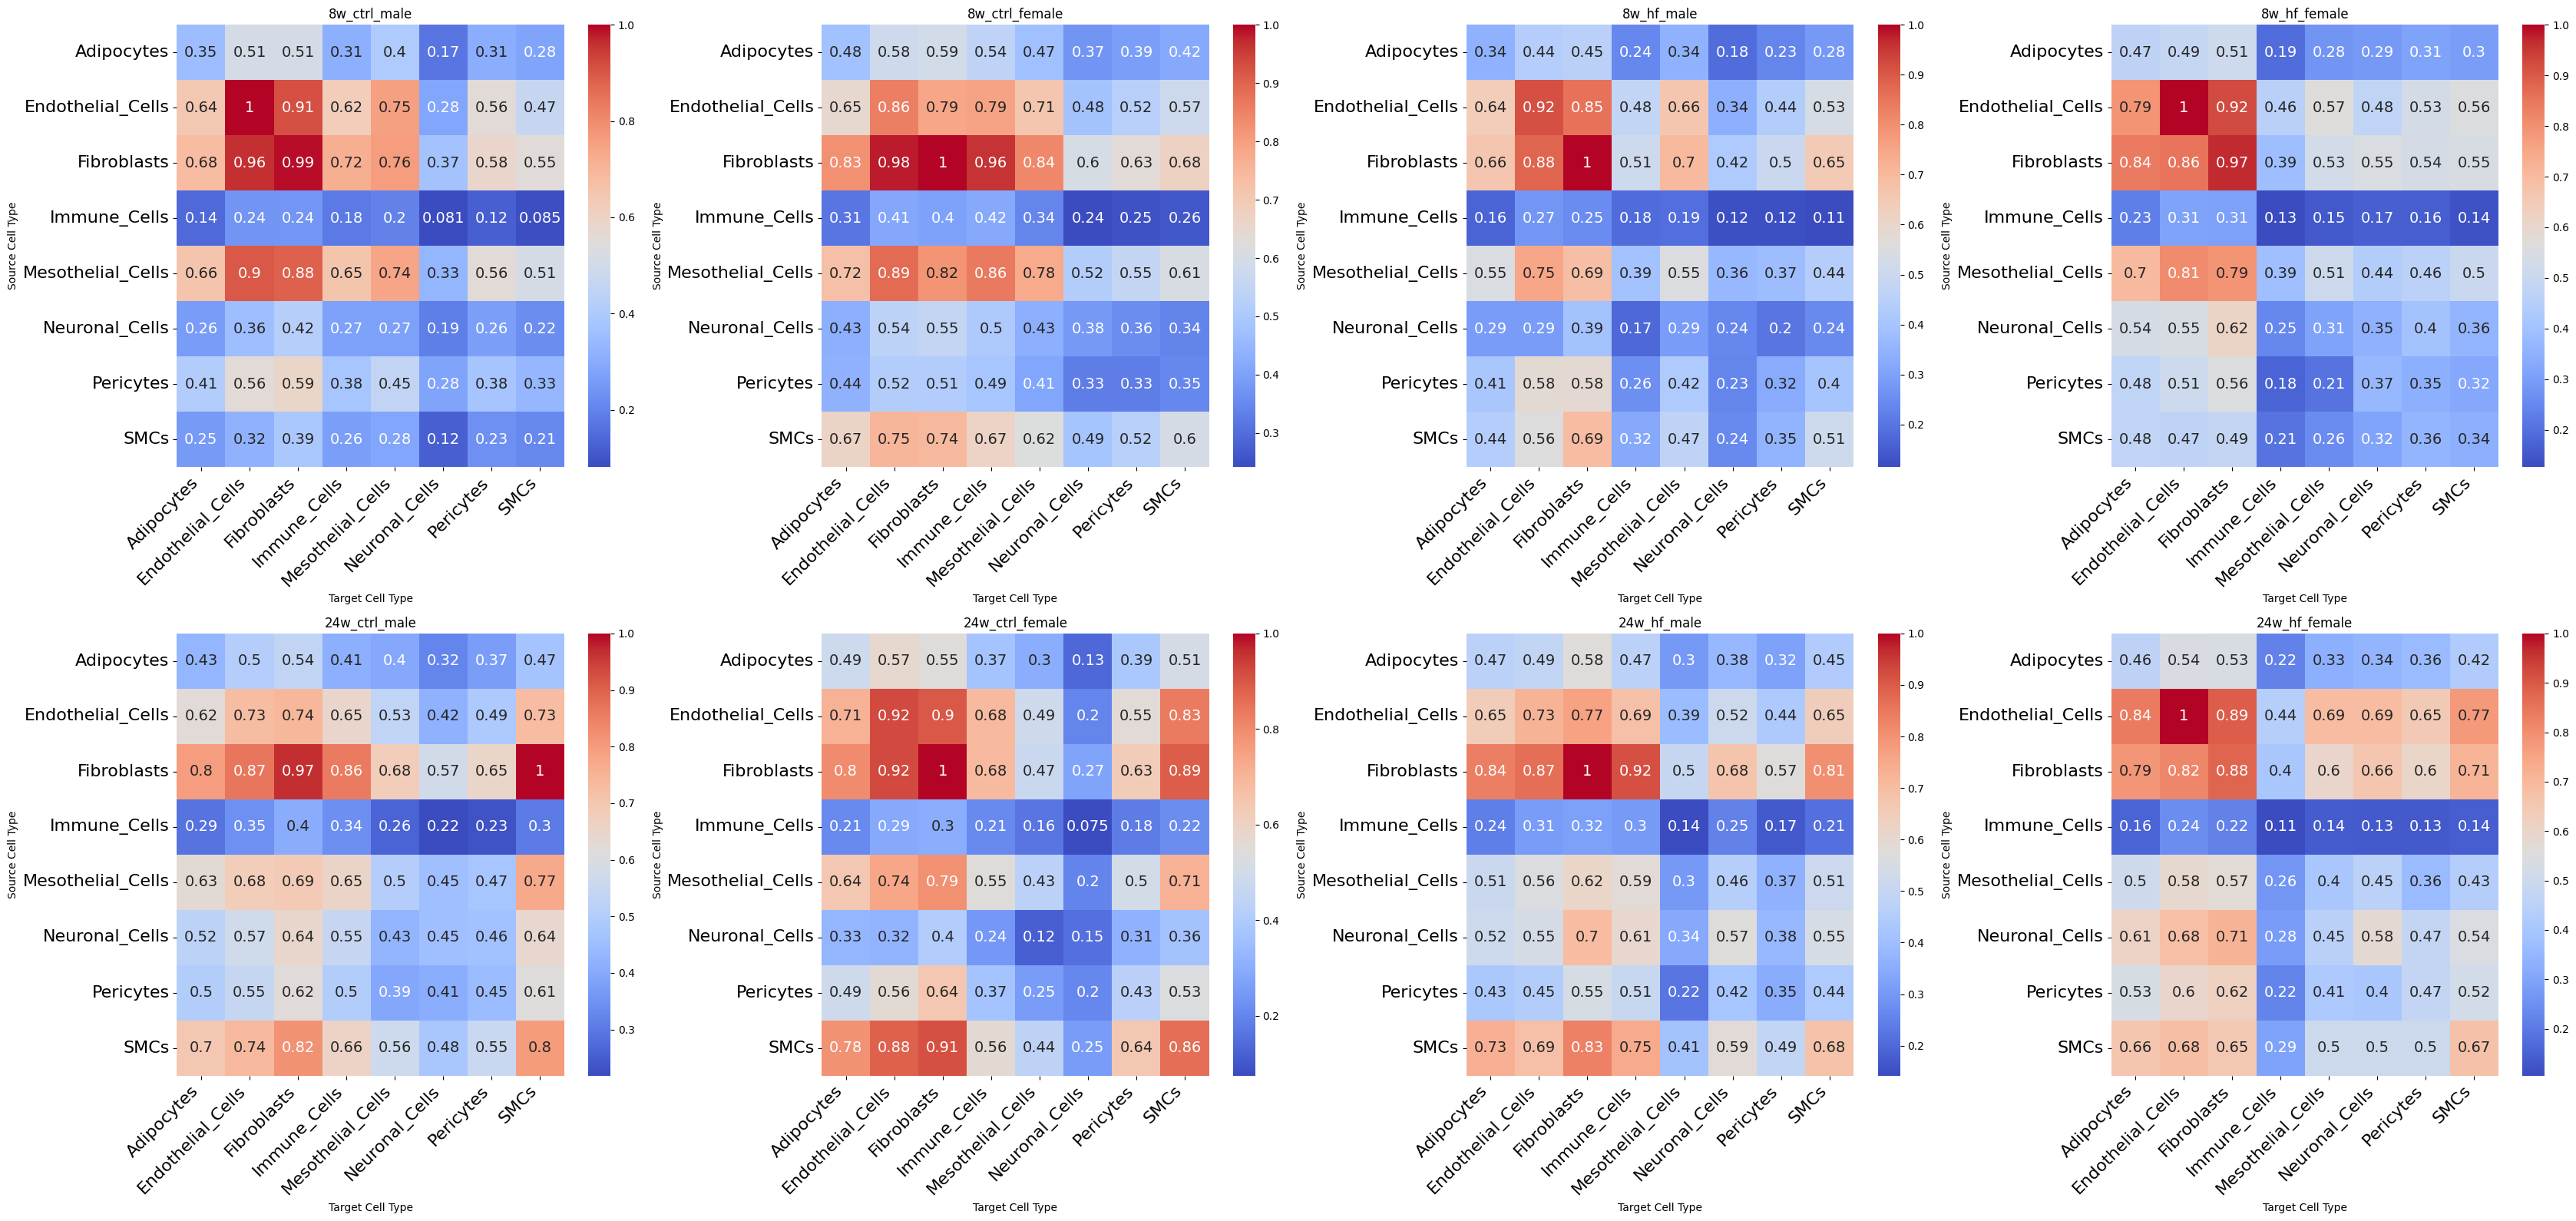

In [25]:
interaction_dfs = {
    "8w_ctrl_male": datasets['8w_ctrl_male'].uns['nichenet_interaction_table_count'],
    "8w_ctrl_female": datasets['8w_ctrl_female'].uns['nichenet_interaction_table_count'],
    "8w_hf_male": datasets['8w_hf_male'].uns['nichenet_interaction_table_count'],
    "8w_hf_female": datasets['8w_hf_female'].uns['nichenet_interaction_table_count'],
    "24w_ctrl_male": datasets['24w_ctrl_male'].uns['nichenet_interaction_table_count'],
    "24w_ctrl_female": datasets['24w_ctrl_female'].uns['nichenet_interaction_table_count'],
    "24w_hf_male": datasets['24w_hf_male'].uns['nichenet_interaction_table_count'],
    "24w_hf_female": datasets['24w_hf_female'].uns['nichenet_interaction_table_count']
} 

fig, axes = plt.subplots(2, 4, figsize=(34, 16))

for ax, (title, matrix) in zip(axes.flatten(), interaction_dfs.items()):
    sns.heatmap(matrix / matrix.max().max(), ax=ax, cmap="coolwarm", annot=True, cbar=True, annot_kws={"size": 14})
    ax.set_title(title)
    ax.set_xlabel('Target Cell Type')
    ax.set_ylabel('Source Cell Type')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=16)  
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)  

plt.tight_layout()
plt.savefig('Normalized_Interactions_Count.pdf', format='pdf')
plt.show()

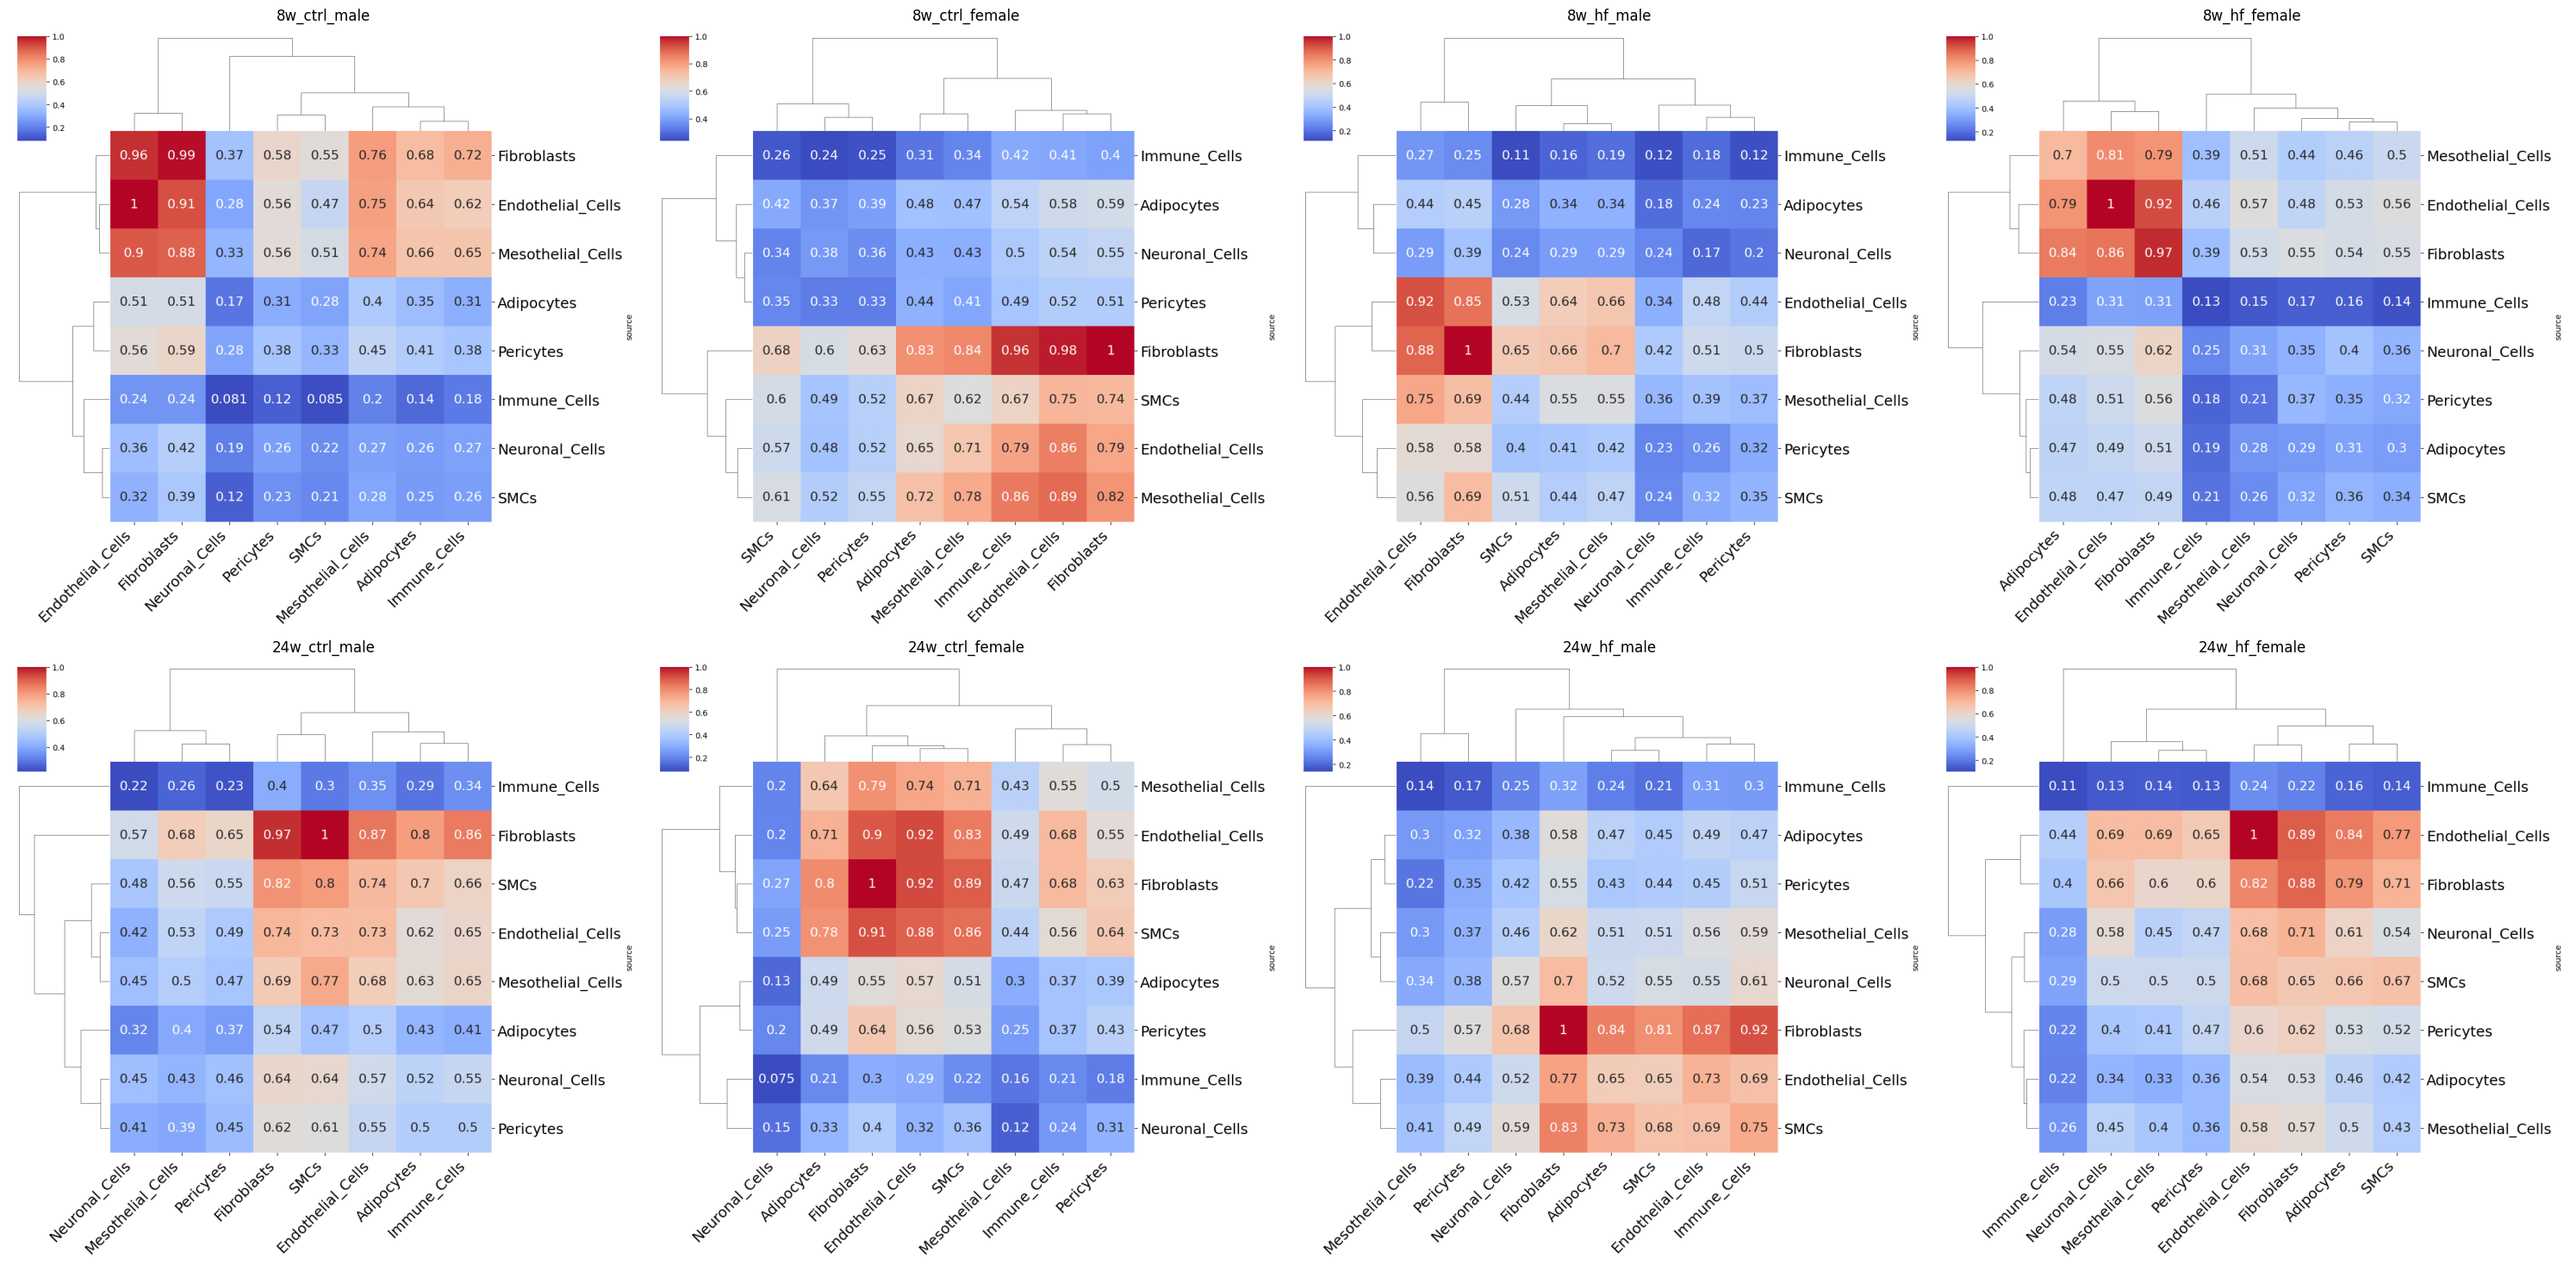

In [32]:
interaction_dfs = {
    "8w_ctrl_male": datasets['8w_ctrl_male'].uns['nichenet_interaction_table_count'],
    "8w_ctrl_female": datasets['8w_ctrl_female'].uns['nichenet_interaction_table_count'],
    "8w_hf_male": datasets['8w_hf_male'].uns['nichenet_interaction_table_count'],
    "8w_hf_female": datasets['8w_hf_female'].uns['nichenet_interaction_table_count'],
    "24w_ctrl_male": datasets['24w_ctrl_male'].uns['nichenet_interaction_table_count'],
    "24w_ctrl_female": datasets['24w_ctrl_female'].uns['nichenet_interaction_table_count'],
    "24w_hf_male": datasets['24w_hf_male'].uns['nichenet_interaction_table_count'],
    "24w_hf_female": datasets['24w_hf_female'].uns['nichenet_interaction_table_count']
} 

fig, axes = plt.subplots(2, 4, figsize=(30, 15))

for i, (title, matrix) in enumerate(interaction_dfs.items()):
    cluster_map = sns.clustermap(
        matrix / matrix.max().max(), 
        cmap="coolwarm", 
        annot=True, 
        cbar=True, 
        annot_kws={"size": 16},  # Adjust annotation size
        figsize=(10, 10)  # Adjust cluster map figure size
    )
    # Adjust tick label font size and rotation
    plt.setp(cluster_map.ax_heatmap.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=18)
    plt.setp(cluster_map.ax_heatmap.yaxis.get_majorticklabels(), fontsize=18)

    cluster_map.savefig(f'{title}.png')
    plt.close(cluster_map.fig)  

    img = plt.imread(f'{title}.png')
    ax = axes.flatten()[i]
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.savefig('Normalized_Interactions_Count_Clustered.pdf', format='pdf')
plt.show()

In [57]:
def log2_transform(matrix):
    return np.log2(matrix.replace(0, np.nan)).replace(np.nan, 0)

### Interaction Count Ratio of HF vs Control

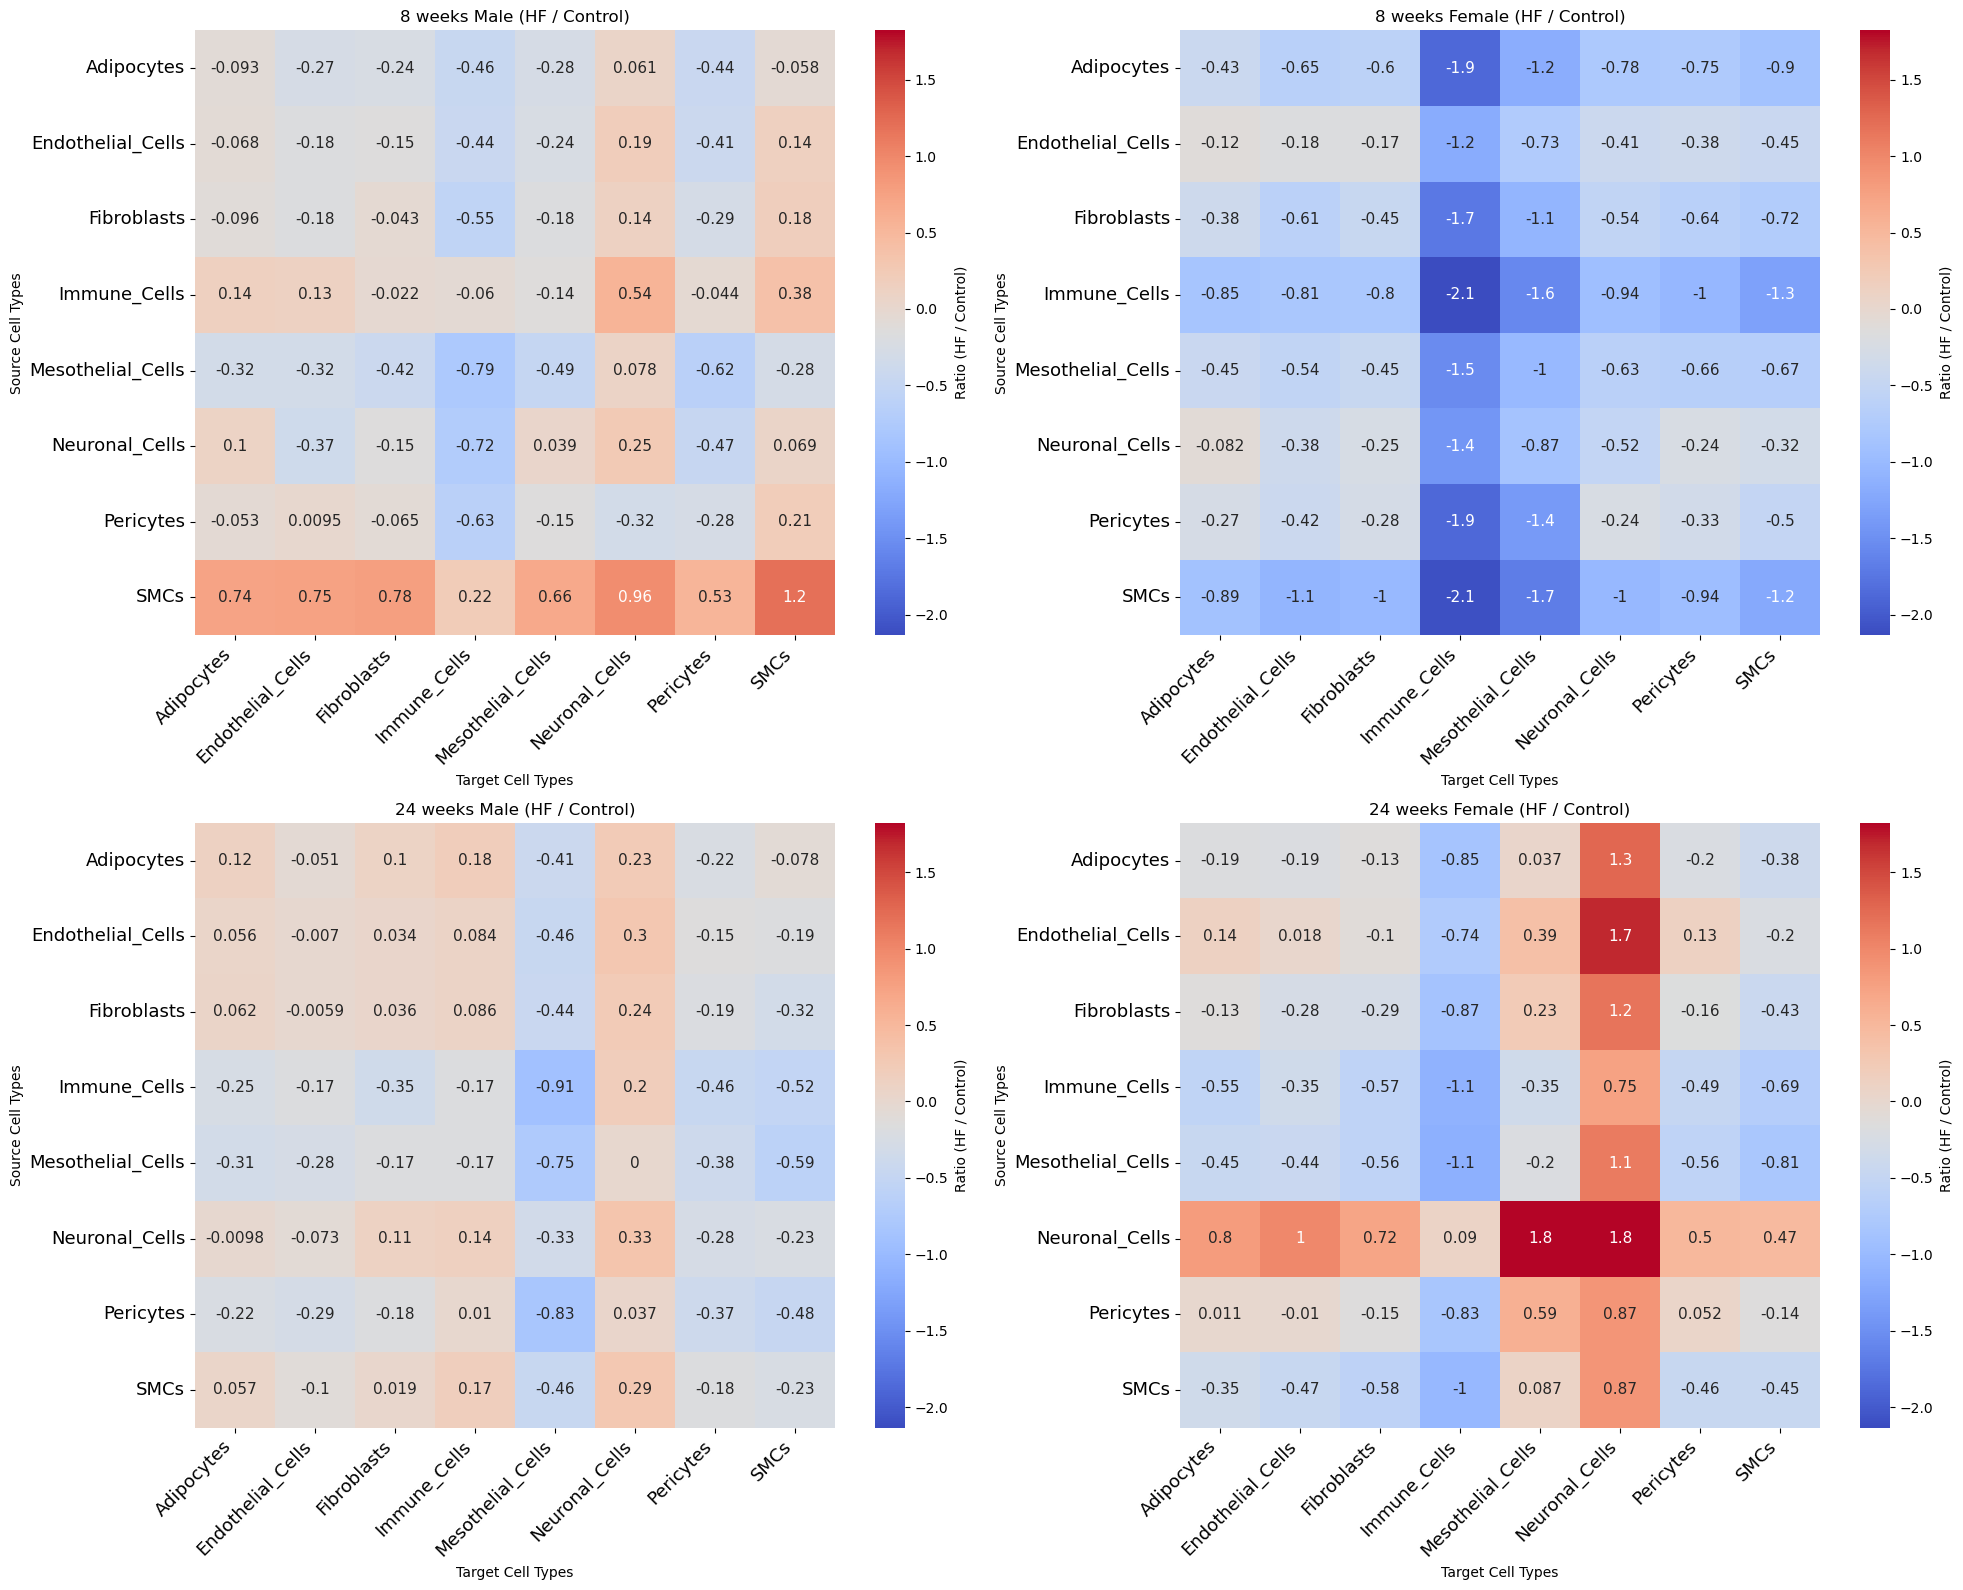

In [74]:
male_8w_hf_vs_control = np.divide(datasets['8w_hf_male'].uns['nichenet_interaction_table_count'], datasets['8w_ctrl_male'].uns['nichenet_interaction_table_count'])
female_8w_hf_vs_control = np.divide(datasets['8w_hf_female'].uns['nichenet_interaction_table_count'], datasets['8w_ctrl_female'].uns['nichenet_interaction_table_count'])
male_24w_hf_vs_control = np.divide(datasets['24w_hf_male'].uns['nichenet_interaction_table_count'], datasets['24w_ctrl_male'].uns['nichenet_interaction_table_count'])
female_24w_hf_vs_control = np.divide(datasets['24w_hf_female'].uns['nichenet_interaction_table_count'], datasets['24w_ctrl_female'].uns['nichenet_interaction_table_count'])


interaction_dfs = {
    '8 weeks Male (HF / Control)': male_8w_hf_vs_control,
    '8 weeks Female (HF / Control)': female_8w_hf_vs_control,
    '24 weeks Male (HF / Control)': male_24w_hf_vs_control,
    '24 weeks Female (HF / Control)': female_24w_hf_vs_control
}

min_scale = np.log2(min([matrix.min().min() for matrix in interaction_dfs.values()]))
max_scale = np.log2(max([matrix.max().max() for matrix in interaction_dfs.values()]))


fig, axes = plt.subplots(2, 2, figsize=(20, 16))
cmap = sns.diverging_palette(220, 10, as_cmap=True) 

for ax, (title, matrix) in zip(axes.flatten(), interaction_dfs.items()):
    sns.heatmap(log2_transform(matrix), annot=True, cmap="coolwarm", ax=ax, cbar_kws={'label': 'Ratio (HF / Control)'}, vmin=min_scale,vmax=max_scale, annot_kws={"size": 11})
    
    
    ax.set_title(title)
    ax.set_xlabel('Target Cell Types')
    ax.set_ylabel('Source Cell Types')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=13)  
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=13) 

plt.tight_layout()
plt.savefig('Interactions_Count_HF_vs_Control.pdf', format='pdf')
plt.show()

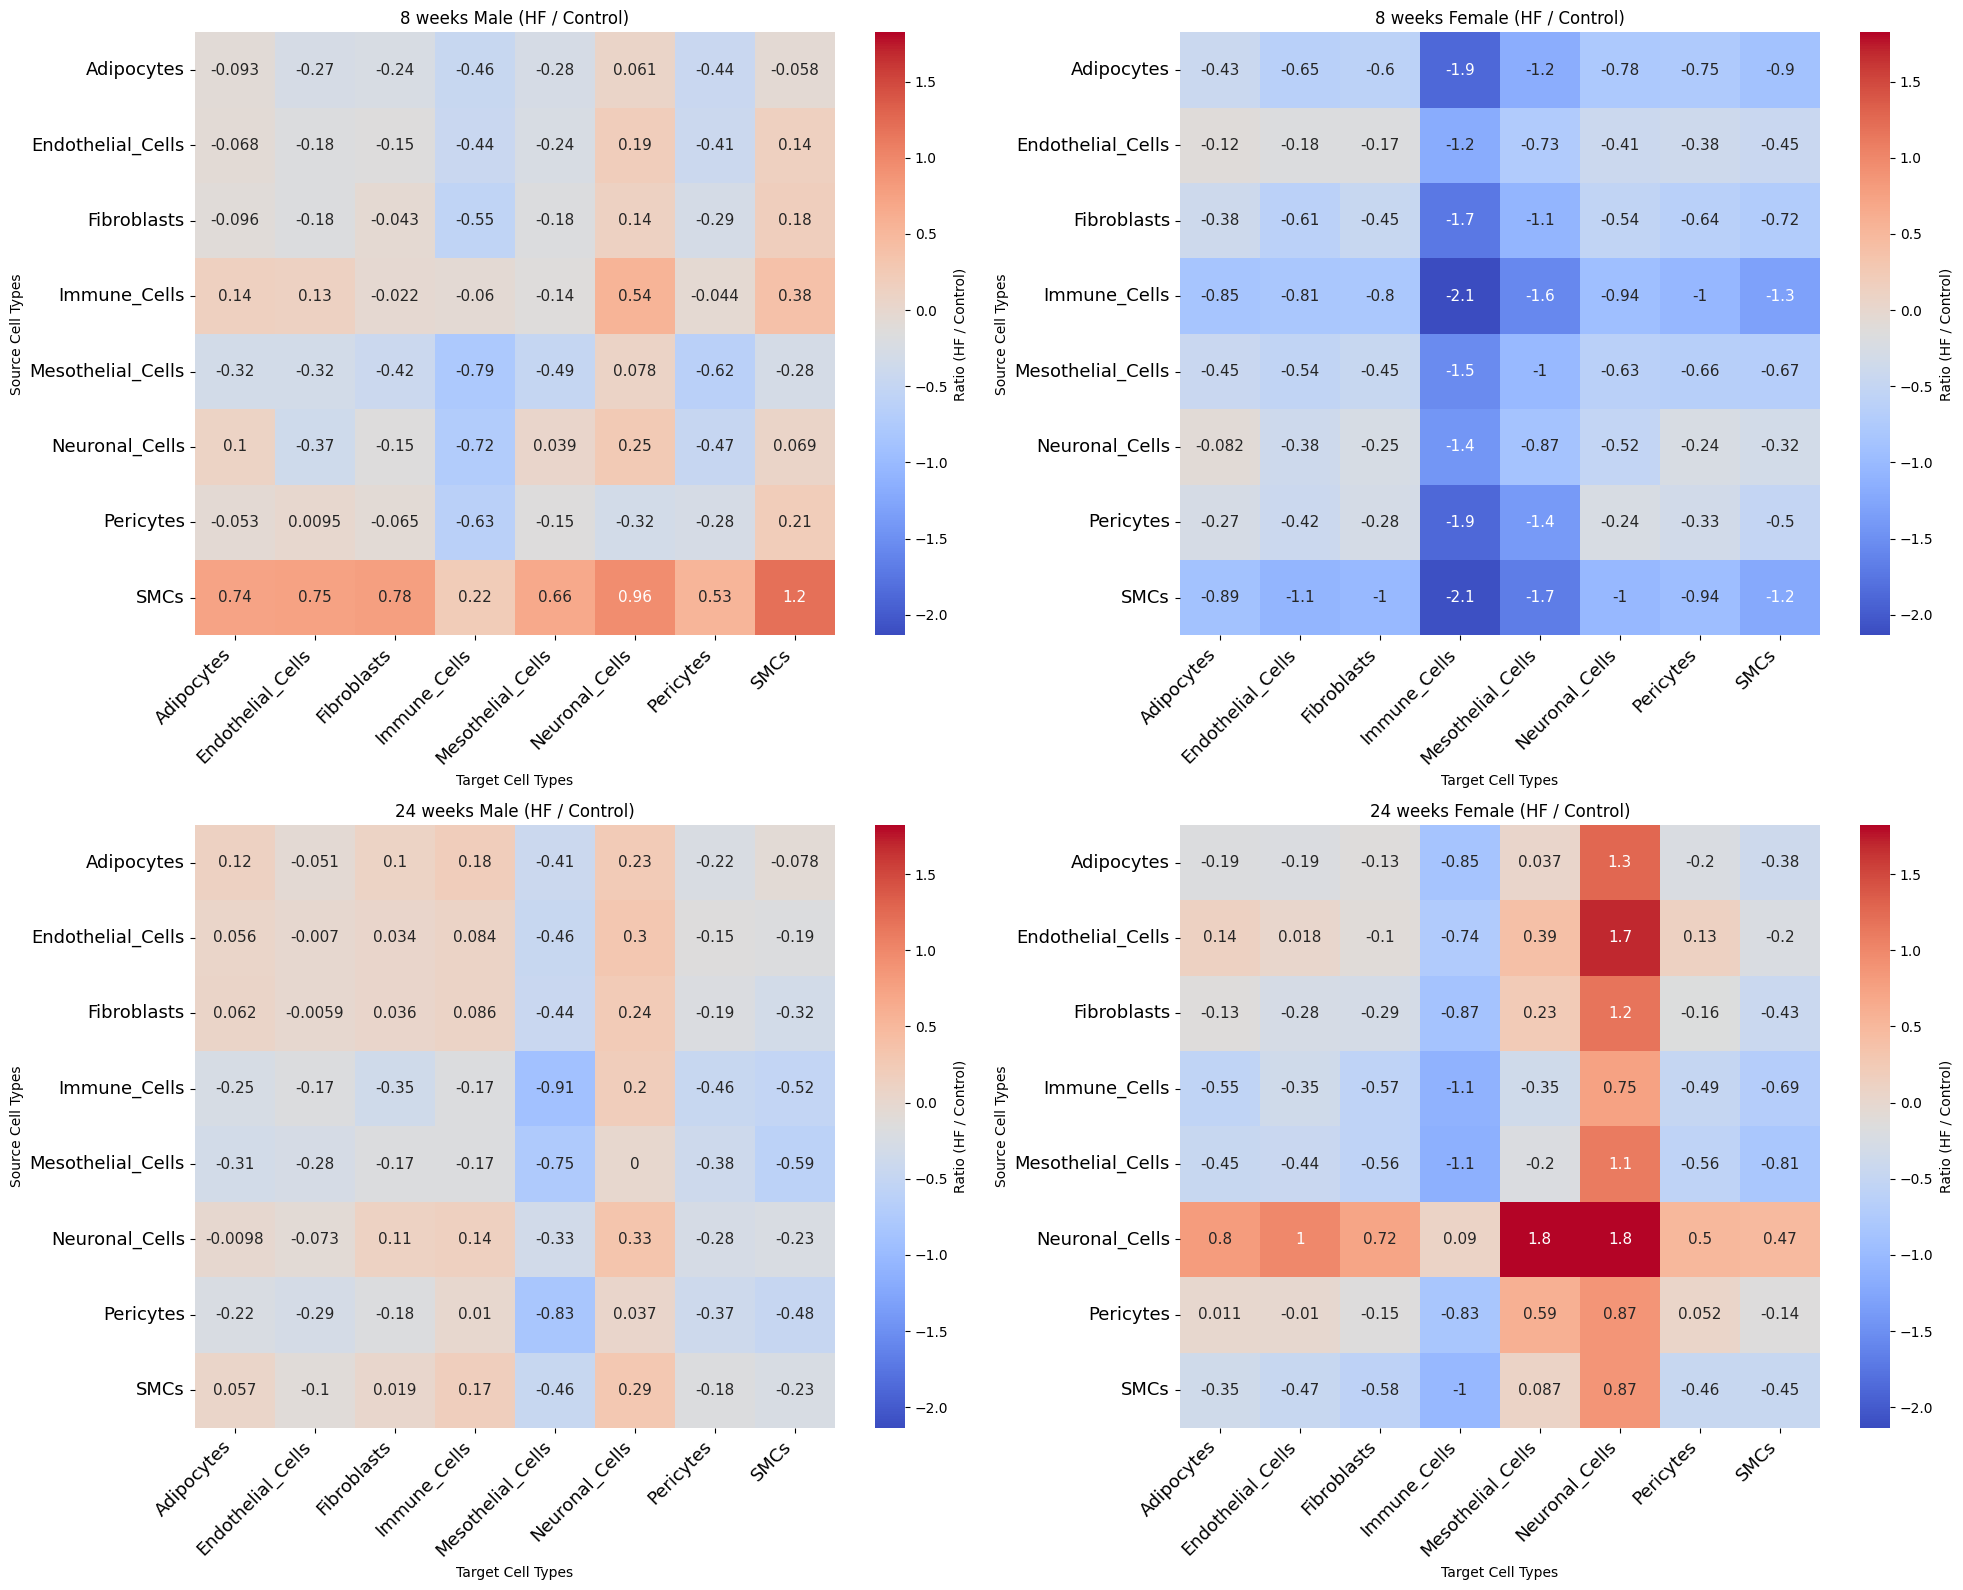

In [41]:
male_8w_hf_vs_control = np.divide(datasets['8w_hf_male'].uns['nichenet_interaction_table_count'], datasets['8w_ctrl_male'].uns['nichenet_interaction_table_count'])
female_8w_hf_vs_control = np.divide(datasets['8w_hf_female'].uns['nichenet_interaction_table_count'], datasets['8w_ctrl_female'].uns['nichenet_interaction_table_count'])
male_24w_hf_vs_control = np.divide(datasets['24w_hf_male'].uns['nichenet_interaction_table_count'], datasets['24w_ctrl_male'].uns['nichenet_interaction_table_count'])
female_24w_hf_vs_control = np.divide(datasets['24w_hf_female'].uns['nichenet_interaction_table_count'], datasets['24w_ctrl_female'].uns['nichenet_interaction_table_count'])


interaction_dfs = {
    '8 weeks Male (HF / Control)': male_8w_hf_vs_control,
    '8 weeks Female (HF / Control)': female_8w_hf_vs_control,
    '24 weeks Male (HF / Control)': male_24w_hf_vs_control,
    '24 weeks Female (HF / Control)': female_24w_hf_vs_control
}

min_scale = np.log2(min([matrix.min().min() for matrix in interaction_dfs.values()]))
max_scale = np.log2(max([matrix.max().max() for matrix in interaction_dfs.values()]))


fig, axes = plt.subplots(2, 2, figsize=(20, 16))
cmap = sns.diverging_palette(220, 10, as_cmap=True) 

for ax, (title, matrix) in zip(axes.flatten(), interaction_dfs.items()):
    sns.heatmap(log2_transform(matrix), annot=True, cmap="coolwarm", ax=ax, cbar_kws={'label': 'Ratio (HF / Control)'}, vmin=min_scale,vmax=max_scale, annot_kws={"size": 11})
    
    
    ax.set_title(title)
    ax.set_xlabel('Target Cell Types')
    ax.set_ylabel('Source Cell Types')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=13)  
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=13) 

plt.tight_layout()
plt.savefig('Interactions_Count_HF_vs_Control.pdf', format='pdf')
plt.show()

In [114]:
interaction_dfs = {
    "8w_ctrl_male": datasets['8w_ctrl_male'].uns['nichenet_interaction_table_count'],
    "8w_ctrl_female": datasets['8w_ctrl_female'].uns['nichenet_interaction_table_count'],
    "8w_hf_male": datasets['8w_hf_male'].uns['nichenet_interaction_table_count'],
    "8w_hf_female": datasets['8w_hf_female'].uns['nichenet_interaction_table_count'],
    "24w_ctrl_male": datasets['24w_ctrl_male'].uns['nichenet_interaction_table_count'],
    "24w_ctrl_female": datasets['24w_ctrl_female'].uns['nichenet_interaction_table_count'],
    "24w_hf_male": datasets['24w_hf_male'].uns['nichenet_interaction_table_count'],
    "24w_hf_female": datasets['24w_hf_female'].uns['nichenet_interaction_table_count']
}
interaction_data = []
for condition, interaction_table in interaction_dfs.items():
    interaction_table = interaction_table.stack().reset_index()
    interaction_table.columns = ['Source', 'Target', 'Interaction_Count']
    interaction_table['Condition'] = condition
    interaction_data.append(interaction_table)
    
interaction_df = pd.concat(interaction_data)
interaction_df['Time_Point'] = interaction_df['Condition'].apply(lambda x: '8 weeks' if '8w' in x else '24 weeks')
interaction_df_male = interaction_df[interaction_df['Condition'].str.contains('male', regex=False) & ~interaction_df['Condition'].str.contains('female', regex=False)]
interaction_df_female = interaction_df[interaction_df['Condition'].str.contains('female')]

In [119]:
interaction_df_male.pivot_table(index=['Source', 'Target'], columns='Condition', values='Interaction_Count').reset_index()

Condition      Source             Target  24w_ctrl_male  24w_hf_male  \
0          Adipocytes         Adipocytes            122          133   
1          Adipocytes  Endothelial_Cells            143          138   
2          Adipocytes        Fibroblasts            152          163   
3          Adipocytes       Immune_Cells            117          133   
4          Adipocytes  Mesothelial_Cells            113           85   
..                ...                ...            ...          ...   
59               SMCs       Immune_Cells            187          211   
60               SMCs  Mesothelial_Cells            160          116   
61               SMCs     Neuronal_Cells            135          165   
62               SMCs          Pericytes            157          139   
63               SMCs               SMCs            227          193   

Condition  8w_ctrl_male  8w_hf_male  
0                    96          90  
1                   139         115  
2                   139         118  
3                    85          62  
4                   109          90  
..                  ...         ...  
59                   72          84  
60                   77         122  
61                   33          64  
62                   63          91  
63                   58         133  

[64 rows x 6 columns]

In [121]:
interaction_8w_male = interaction_df_male[interaction_df_male['Condition'].isin(['8w_ctrl_male', '8w_hf_male'])]
interaction_8w_male = interaction_8w_male.pivot_table(index=['Source', 'Target'], columns='Condition', values='Interaction_Count').reset_index()
interaction_8w_male['Change_8w'] = interaction_8w_male['8w_hf_male'] - interaction_8w_male['8w_ctrl_male']
interaction_8w_male

Condition      Source             Target  8w_ctrl_male  8w_hf_male  Change_8w
0          Adipocytes         Adipocytes            96          90         -6
1          Adipocytes  Endothelial_Cells           139         115        -24
2          Adipocytes        Fibroblasts           139         118        -21
3          Adipocytes       Immune_Cells            85          62        -23
4          Adipocytes  Mesothelial_Cells           109          90        -19
..                ...                ...           ...         ...        ...
59               SMCs       Immune_Cells            72          84         12
60               SMCs  Mesothelial_Cells            77         122         45
61               SMCs     Neuronal_Cells            33          64         31
62               SMCs          Pericytes            63          91         28
63               SMCs               SMCs            58         133         75

[64 rows x 5 columns]

### Change in Interaction Count Over Time

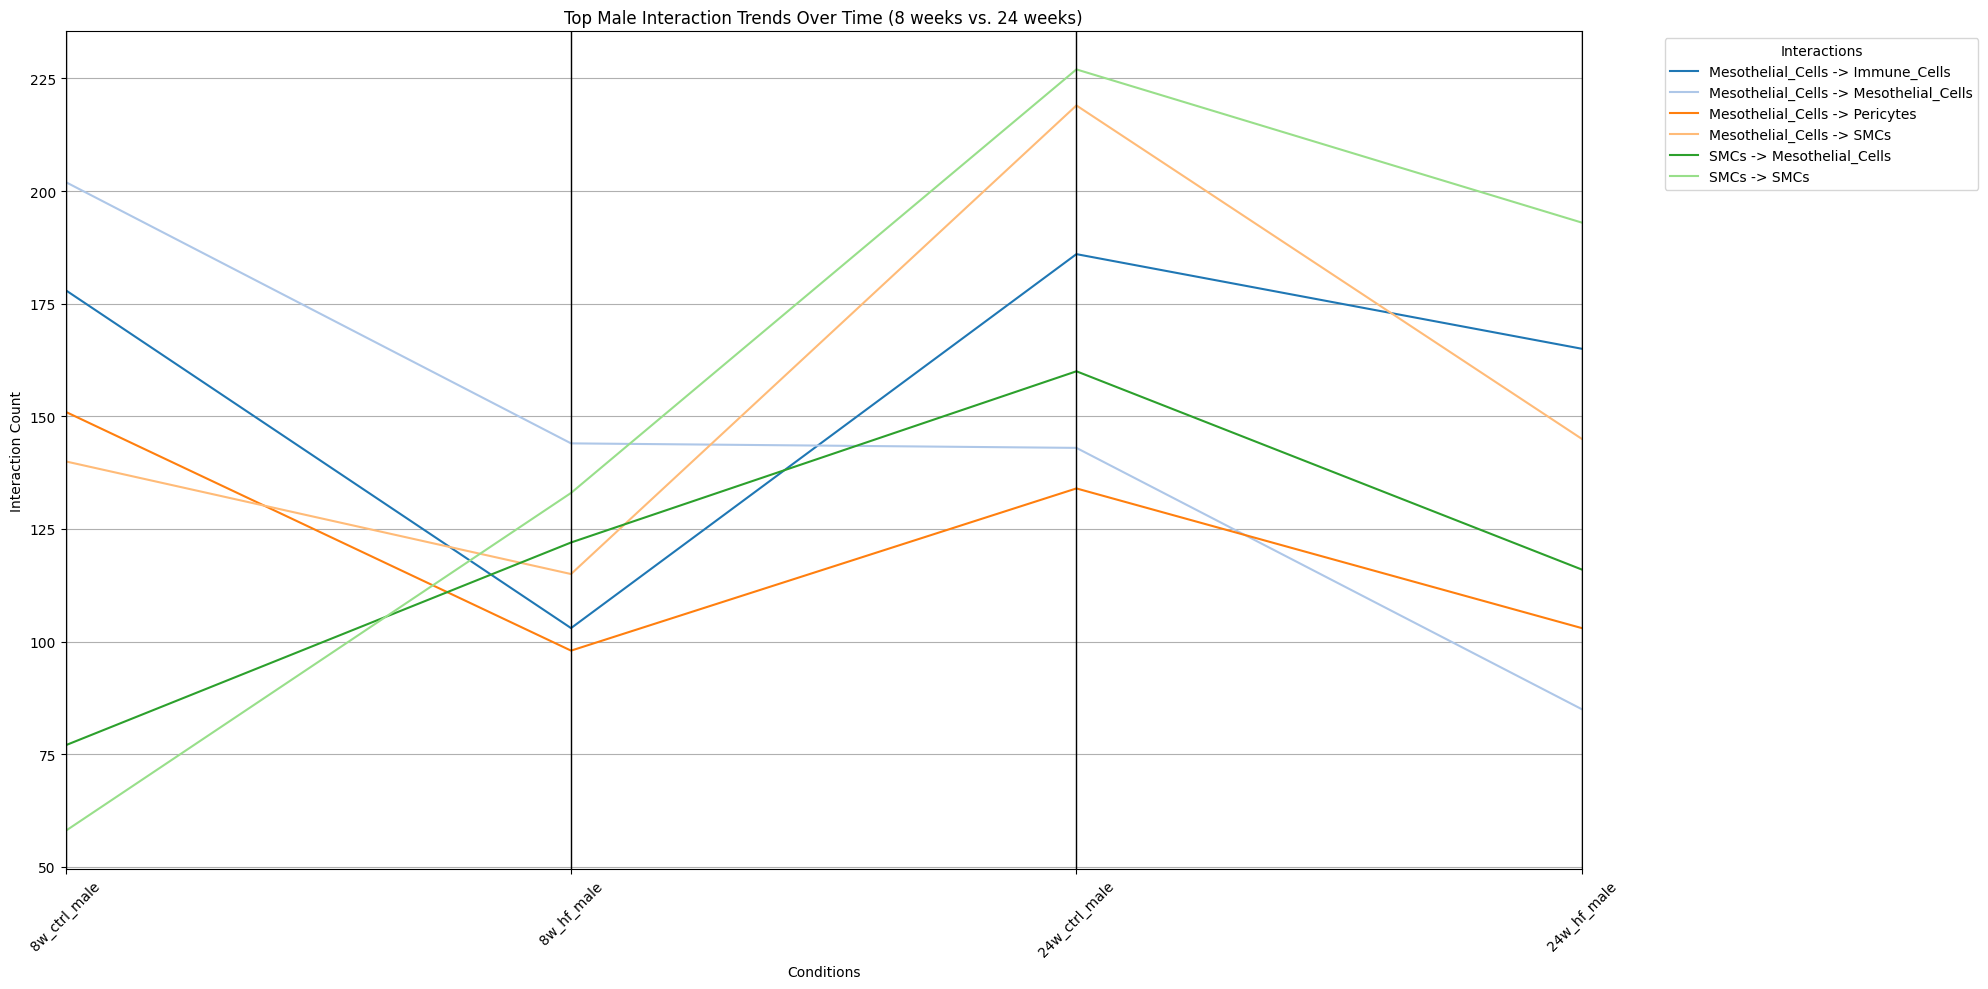

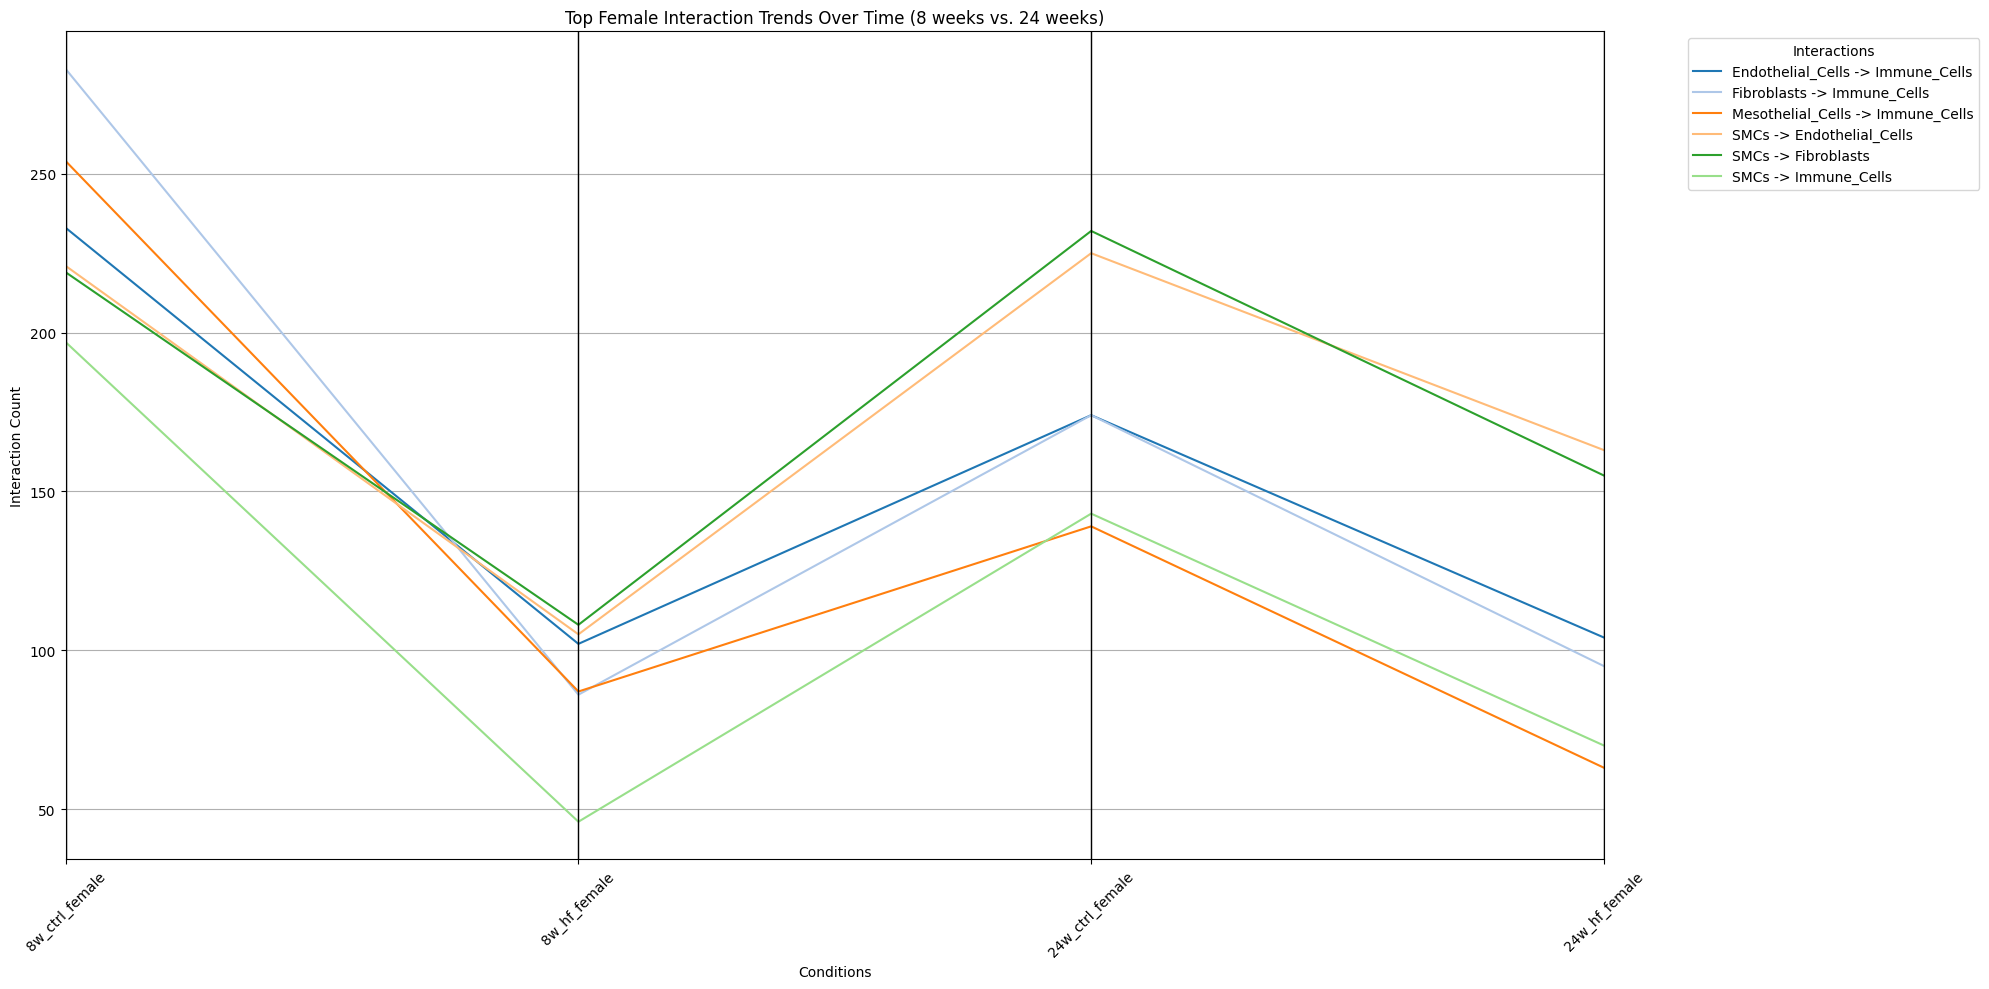

In [42]:
interaction_dfs = {
    "8w_ctrl_male": datasets['8w_ctrl_male'].uns['nichenet_interaction_table_count'],
    "8w_ctrl_female": datasets['8w_ctrl_female'].uns['nichenet_interaction_table_count'],
    "8w_hf_male": datasets['8w_hf_male'].uns['nichenet_interaction_table_count'],
    "8w_hf_female": datasets['8w_hf_female'].uns['nichenet_interaction_table_count'],
    "24w_ctrl_male": datasets['24w_ctrl_male'].uns['nichenet_interaction_table_count'],
    "24w_ctrl_female": datasets['24w_ctrl_female'].uns['nichenet_interaction_table_count'],
    "24w_hf_male": datasets['24w_hf_male'].uns['nichenet_interaction_table_count'],
    "24w_hf_female": datasets['24w_hf_female'].uns['nichenet_interaction_table_count']
}

interaction_data = []
for condition, interaction_table in interaction_dfs.items():
    interaction_table = interaction_table.stack().reset_index()
    interaction_table.columns = ['Source', 'Target', 'Interaction_Count']
    interaction_table['Condition'] = condition
    interaction_data.append(interaction_table)

interaction_df = pd.concat(interaction_data)
interaction_df['Time_Point'] = interaction_df['Condition'].apply(lambda x: '8 weeks' if '8w' in x else '24 weeks')

interaction_df_male = interaction_df[interaction_df['Condition'].str.contains('male', regex=False) & ~interaction_df['Condition'].str.contains('female', regex=False)]
interaction_df_female = interaction_df[interaction_df['Condition'].str.contains('female', regex=False)]

interaction_pivot_male = interaction_df_male.pivot_table(index=['Source', 'Target'], columns='Condition', values='Interaction_Count').reset_index()
interaction_pivot_female = interaction_df_female.pivot_table(index=['Source', 'Target'], columns='Condition', values='Interaction_Count').reset_index()

interaction_pivot_male['Change_8w'] = interaction_pivot_male['8w_hf_male'] - interaction_pivot_male['8w_ctrl_male']
interaction_pivot_male['Change_24w'] = interaction_pivot_male['24w_hf_male'] - interaction_pivot_male['24w_ctrl_male']
interaction_pivot_male['Overall_Change'] = interaction_pivot_male['Change_8w'].abs() + interaction_pivot_male['Change_24w'].abs()

interaction_pivot_female['Change_8w'] = interaction_pivot_female['8w_hf_female'] - interaction_pivot_female['8w_ctrl_female']
interaction_pivot_female['Change_24w'] = interaction_pivot_female['24w_hf_female'] - interaction_pivot_female['24w_ctrl_female']
interaction_pivot_female['Overall_Change'] = interaction_pivot_female['Change_8w'].abs() + interaction_pivot_female['Change_24w'].abs()

top_male_interactions = interaction_pivot_male.nlargest(6, 'Overall_Change')
top_female_interactions = interaction_pivot_female.nlargest(6, 'Overall_Change')

interaction_wide_male = interaction_df_male[interaction_df_male[['Source', 'Target']].apply(tuple, axis=1).isin(top_male_interactions[['Source', 'Target']].apply(tuple, axis=1))]
interaction_wide_male = interaction_wide_male.pivot_table(index=['Source', 'Target'], columns='Condition', values='Interaction_Count', fill_value=0).reset_index()
interaction_wide_male['Interaction'] = interaction_wide_male['Source'] + ' -> ' + interaction_wide_male['Target']

male_columns_order = ['Source', 'Target', 'Interaction', '8w_ctrl_male', '8w_hf_male', '24w_ctrl_male', '24w_hf_male']
interaction_wide_male = interaction_wide_male[male_columns_order]

plt.figure(figsize=(20, 10))
parallel_coordinates(interaction_wide_male, 'Interaction', cols=male_columns_order[3:], color=plt.cm.tab20.colors)
plt.title('Top Male Interaction Trends Over Time (8 weeks vs. 24 weeks)')
plt.xlabel('Conditions')
plt.ylabel('Interaction Count')
plt.legend(title='Interactions', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



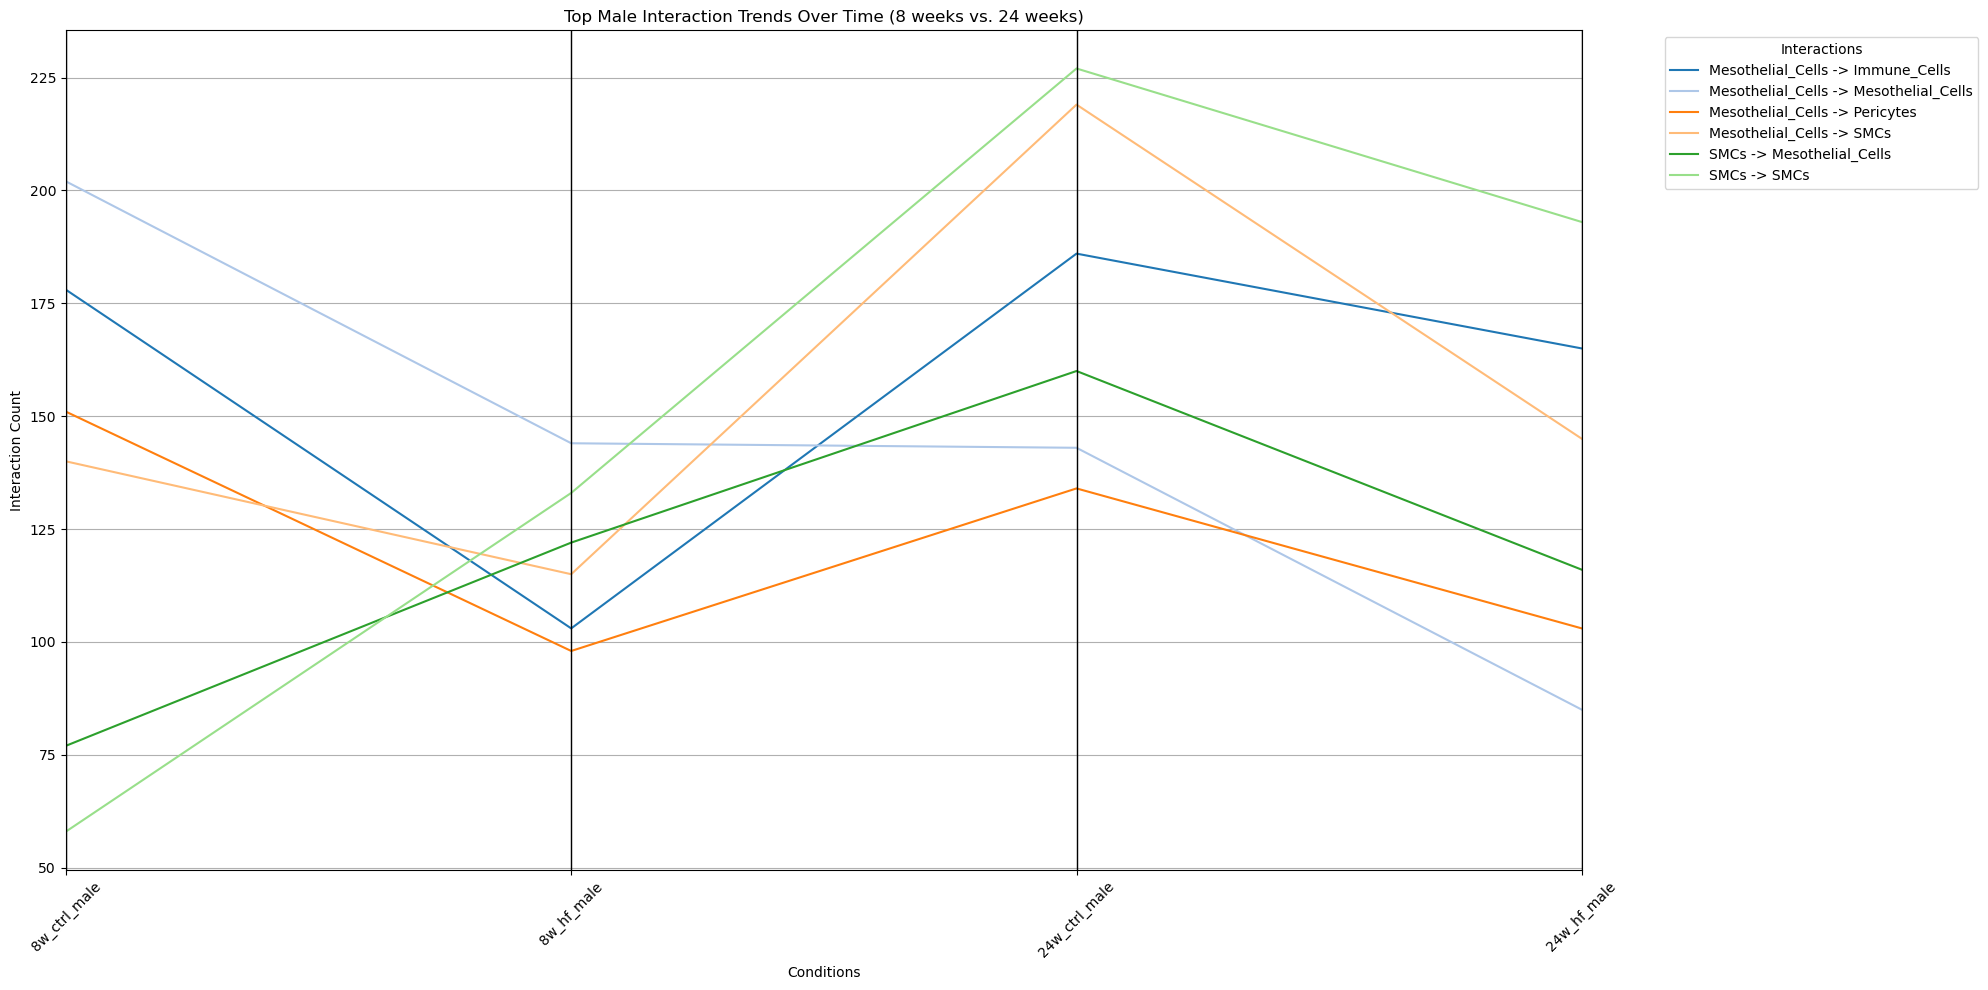

In [8]:
interaction_dfs = {
    "8w_ctrl_male": datasets['8w_ctrl_male'].uns['nichenet_interaction_table_count'],
    "8w_ctrl_female": datasets['8w_ctrl_female'].uns['nichenet_interaction_table_count'],
    "8w_hf_male": datasets['8w_hf_male'].uns['nichenet_interaction_table_count'],
    "8w_hf_female": datasets['8w_hf_female'].uns['nichenet_interaction_table_count'],
    "24w_ctrl_male": datasets['24w_ctrl_male'].uns['nichenet_interaction_table_count'],
    "24w_ctrl_female": datasets['24w_ctrl_female'].uns['nichenet_interaction_table_count'],
    "24w_hf_male": datasets['24w_hf_male'].uns['nichenet_interaction_table_count'],
    "24w_hf_female": datasets['24w_hf_female'].uns['nichenet_interaction_table_count']
}

interaction_data = []
for condition, interaction_table in interaction_dfs.items():
    interaction_table = interaction_table.stack().reset_index()
    interaction_table.columns = ['Source', 'Target', 'Interaction_Count']
    interaction_table['Condition'] = condition
    interaction_data.append(interaction_table)

interaction_df = pd.concat(interaction_data)
interaction_df['Time_Point'] = interaction_df['Condition'].apply(lambda x: '8 weeks' if '8w' in x else '24 weeks')

interaction_df_male = interaction_df[interaction_df['Condition'].str.contains('male', regex=False) & ~interaction_df['Condition'].str.contains('female', regex=False)]
interaction_df_female = interaction_df[interaction_df['Condition'].str.contains('female', regex=False)]

interaction_pivot_male = interaction_df_male.pivot_table(index=['Source', 'Target'], columns='Condition', values='Interaction_Count').reset_index()
interaction_pivot_female = interaction_df_female.pivot_table(index=['Source', 'Target'], columns='Condition', values='Interaction_Count').reset_index()

interaction_pivot_male['Change_8w'] = interaction_pivot_male['8w_hf_male'] - interaction_pivot_male['8w_ctrl_male']
interaction_pivot_male['Change_24w'] = interaction_pivot_male['24w_hf_male'] - interaction_pivot_male['24w_ctrl_male']
interaction_pivot_male['Overall_Change'] = interaction_pivot_male['Change_8w'].abs() + interaction_pivot_male['Change_24w'].abs()

interaction_pivot_female['Change_8w'] = interaction_pivot_female['8w_hf_female'] - interaction_pivot_female['8w_ctrl_female']
interaction_pivot_female['Change_24w'] = interaction_pivot_female['24w_hf_female'] - interaction_pivot_female['24w_ctrl_female']
interaction_pivot_female['Overall_Change'] = interaction_pivot_female['Change_8w'].abs() + interaction_pivot_female['Change_24w'].abs()

top_male_interactions = interaction_pivot_male.nlargest(6, 'Overall_Change')
top_female_interactions = interaction_pivot_female.nlargest(6, 'Overall_Change')

interaction_wide_male = interaction_df_male[interaction_df_male[['Source', 'Target']].apply(tuple, axis=1).isin(top_male_interactions[['Source', 'Target']].apply(tuple, axis=1))]
interaction_wide_male = interaction_wide_male.pivot_table(index=['Source', 'Target'], columns='Condition', values='Interaction_Count', fill_value=0).reset_index()
interaction_wide_male['Interaction'] = interaction_wide_male['Source'] + ' -> ' + interaction_wide_male['Target']

male_columns_order = ['Source', 'Target', 'Interaction', '8w_ctrl_male', '8w_hf_male', '24w_ctrl_male', '24w_hf_male']
interaction_wide_male = interaction_wide_male[male_columns_order]

plt.figure(figsize=(20, 10))
parallel_coordinates(interaction_wide_male, 'Interaction', cols=male_columns_order[3:], color=plt.cm.tab20.colors)
plt.title('Top Male Interaction Trends Over Time (8 weeks vs. 24 weeks)')
plt.xlabel('Conditions')
plt.ylabel('Interaction Count')
plt.legend(title='Interactions', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



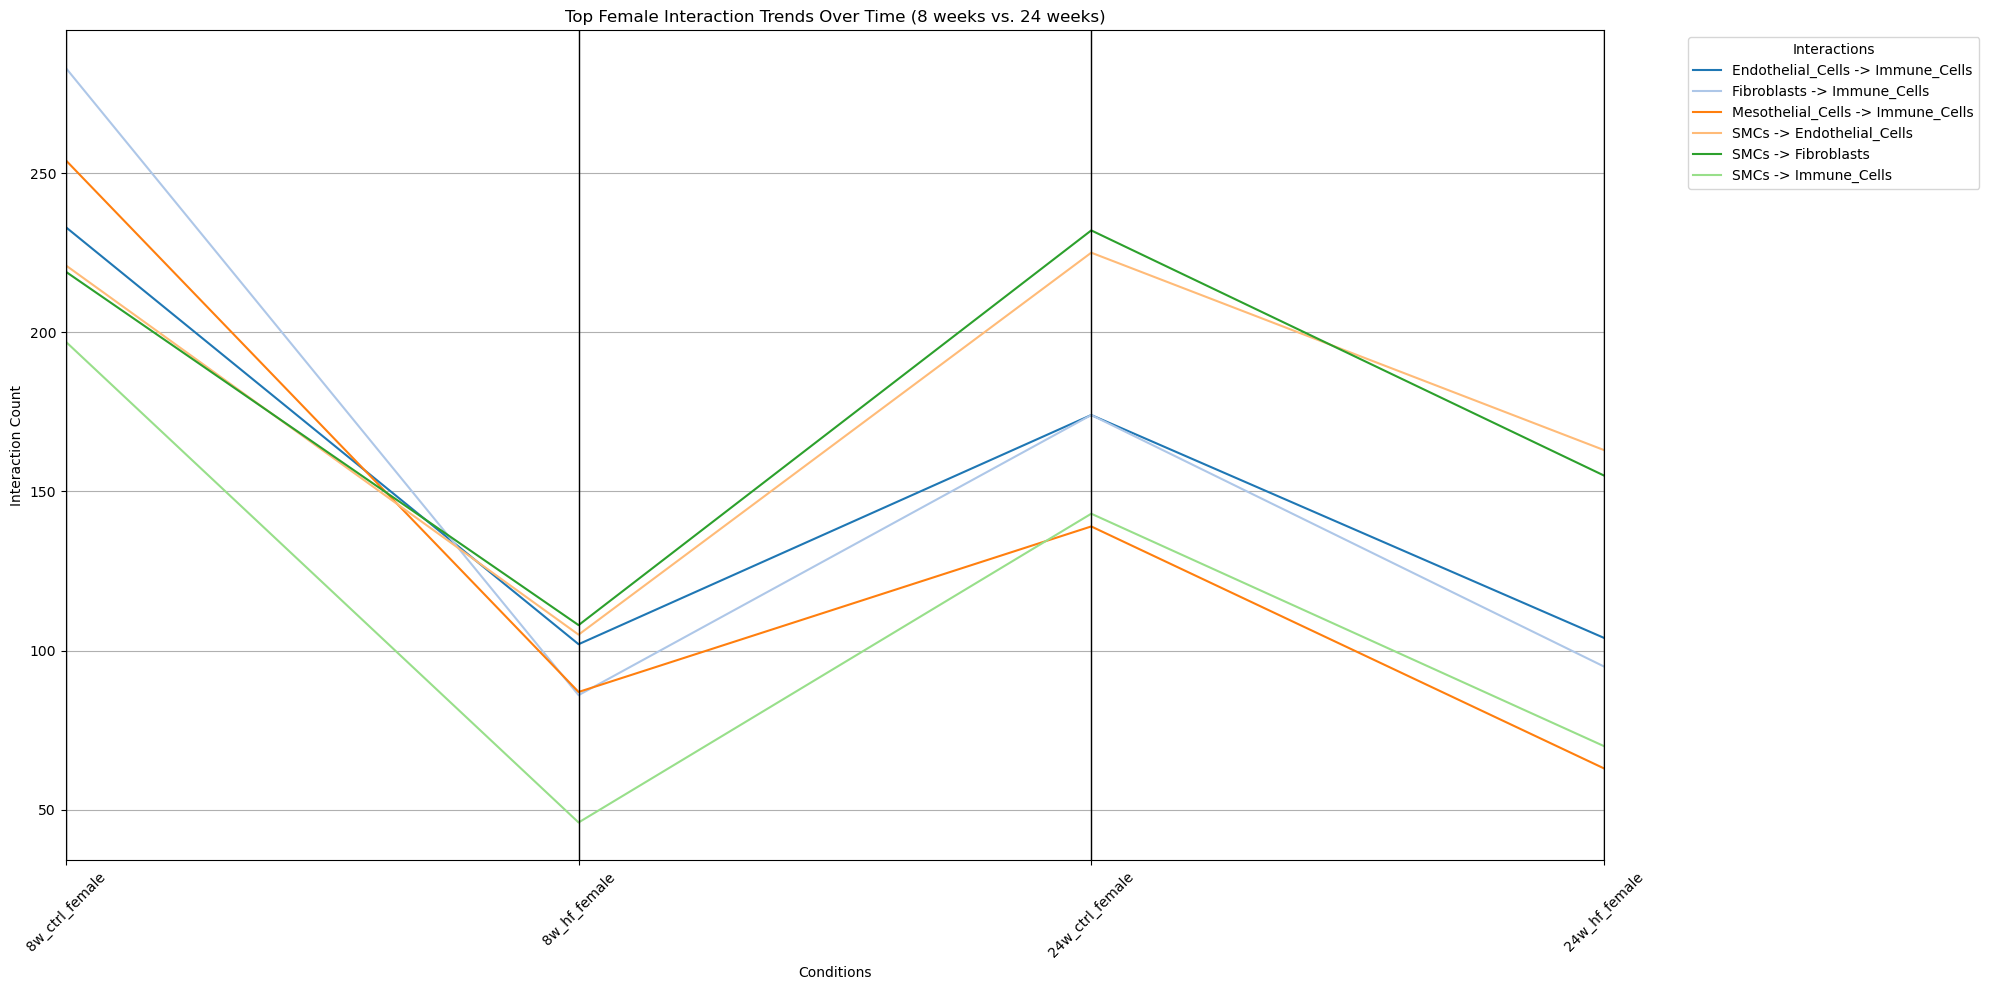

In [9]:
interaction_wide_female = interaction_df_female[interaction_df_female[['Source', 'Target']].apply(tuple, axis=1).isin(top_female_interactions[['Source', 'Target']].apply(tuple, axis=1))]
interaction_wide_female = interaction_wide_female.pivot_table(index=['Source', 'Target'], columns='Condition', values='Interaction_Count', fill_value=0).reset_index()
interaction_wide_female['Interaction'] = interaction_wide_female['Source'] + ' -> ' + interaction_wide_female['Target']

female_columns_order = ['Source', 'Target', 'Interaction', '8w_ctrl_female', '8w_hf_female', '24w_ctrl_female', '24w_hf_female']
interaction_wide_female = interaction_wide_female[female_columns_order]

plt.figure(figsize=(20, 10))
parallel_coordinates(interaction_wide_female, 'Interaction', cols=female_columns_order[3:], color=plt.cm.tab20.colors)
plt.title('Top Female Interaction Trends Over Time (8 weeks vs. 24 weeks)')
plt.xlabel('Conditions')
plt.ylabel('Interaction Count')
plt.legend(title='Interactions', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('Top_Interaction_Trends.pdf', format='pdf')
plt.show()

In [134]:
pwd

'/Users/pandavis/Desktop/lab_directory/pvat_8w_24w_data/codebase/figures'

### Adipocytes to Endothelial Ligand Receptor Heatmap (8 weeks control male)

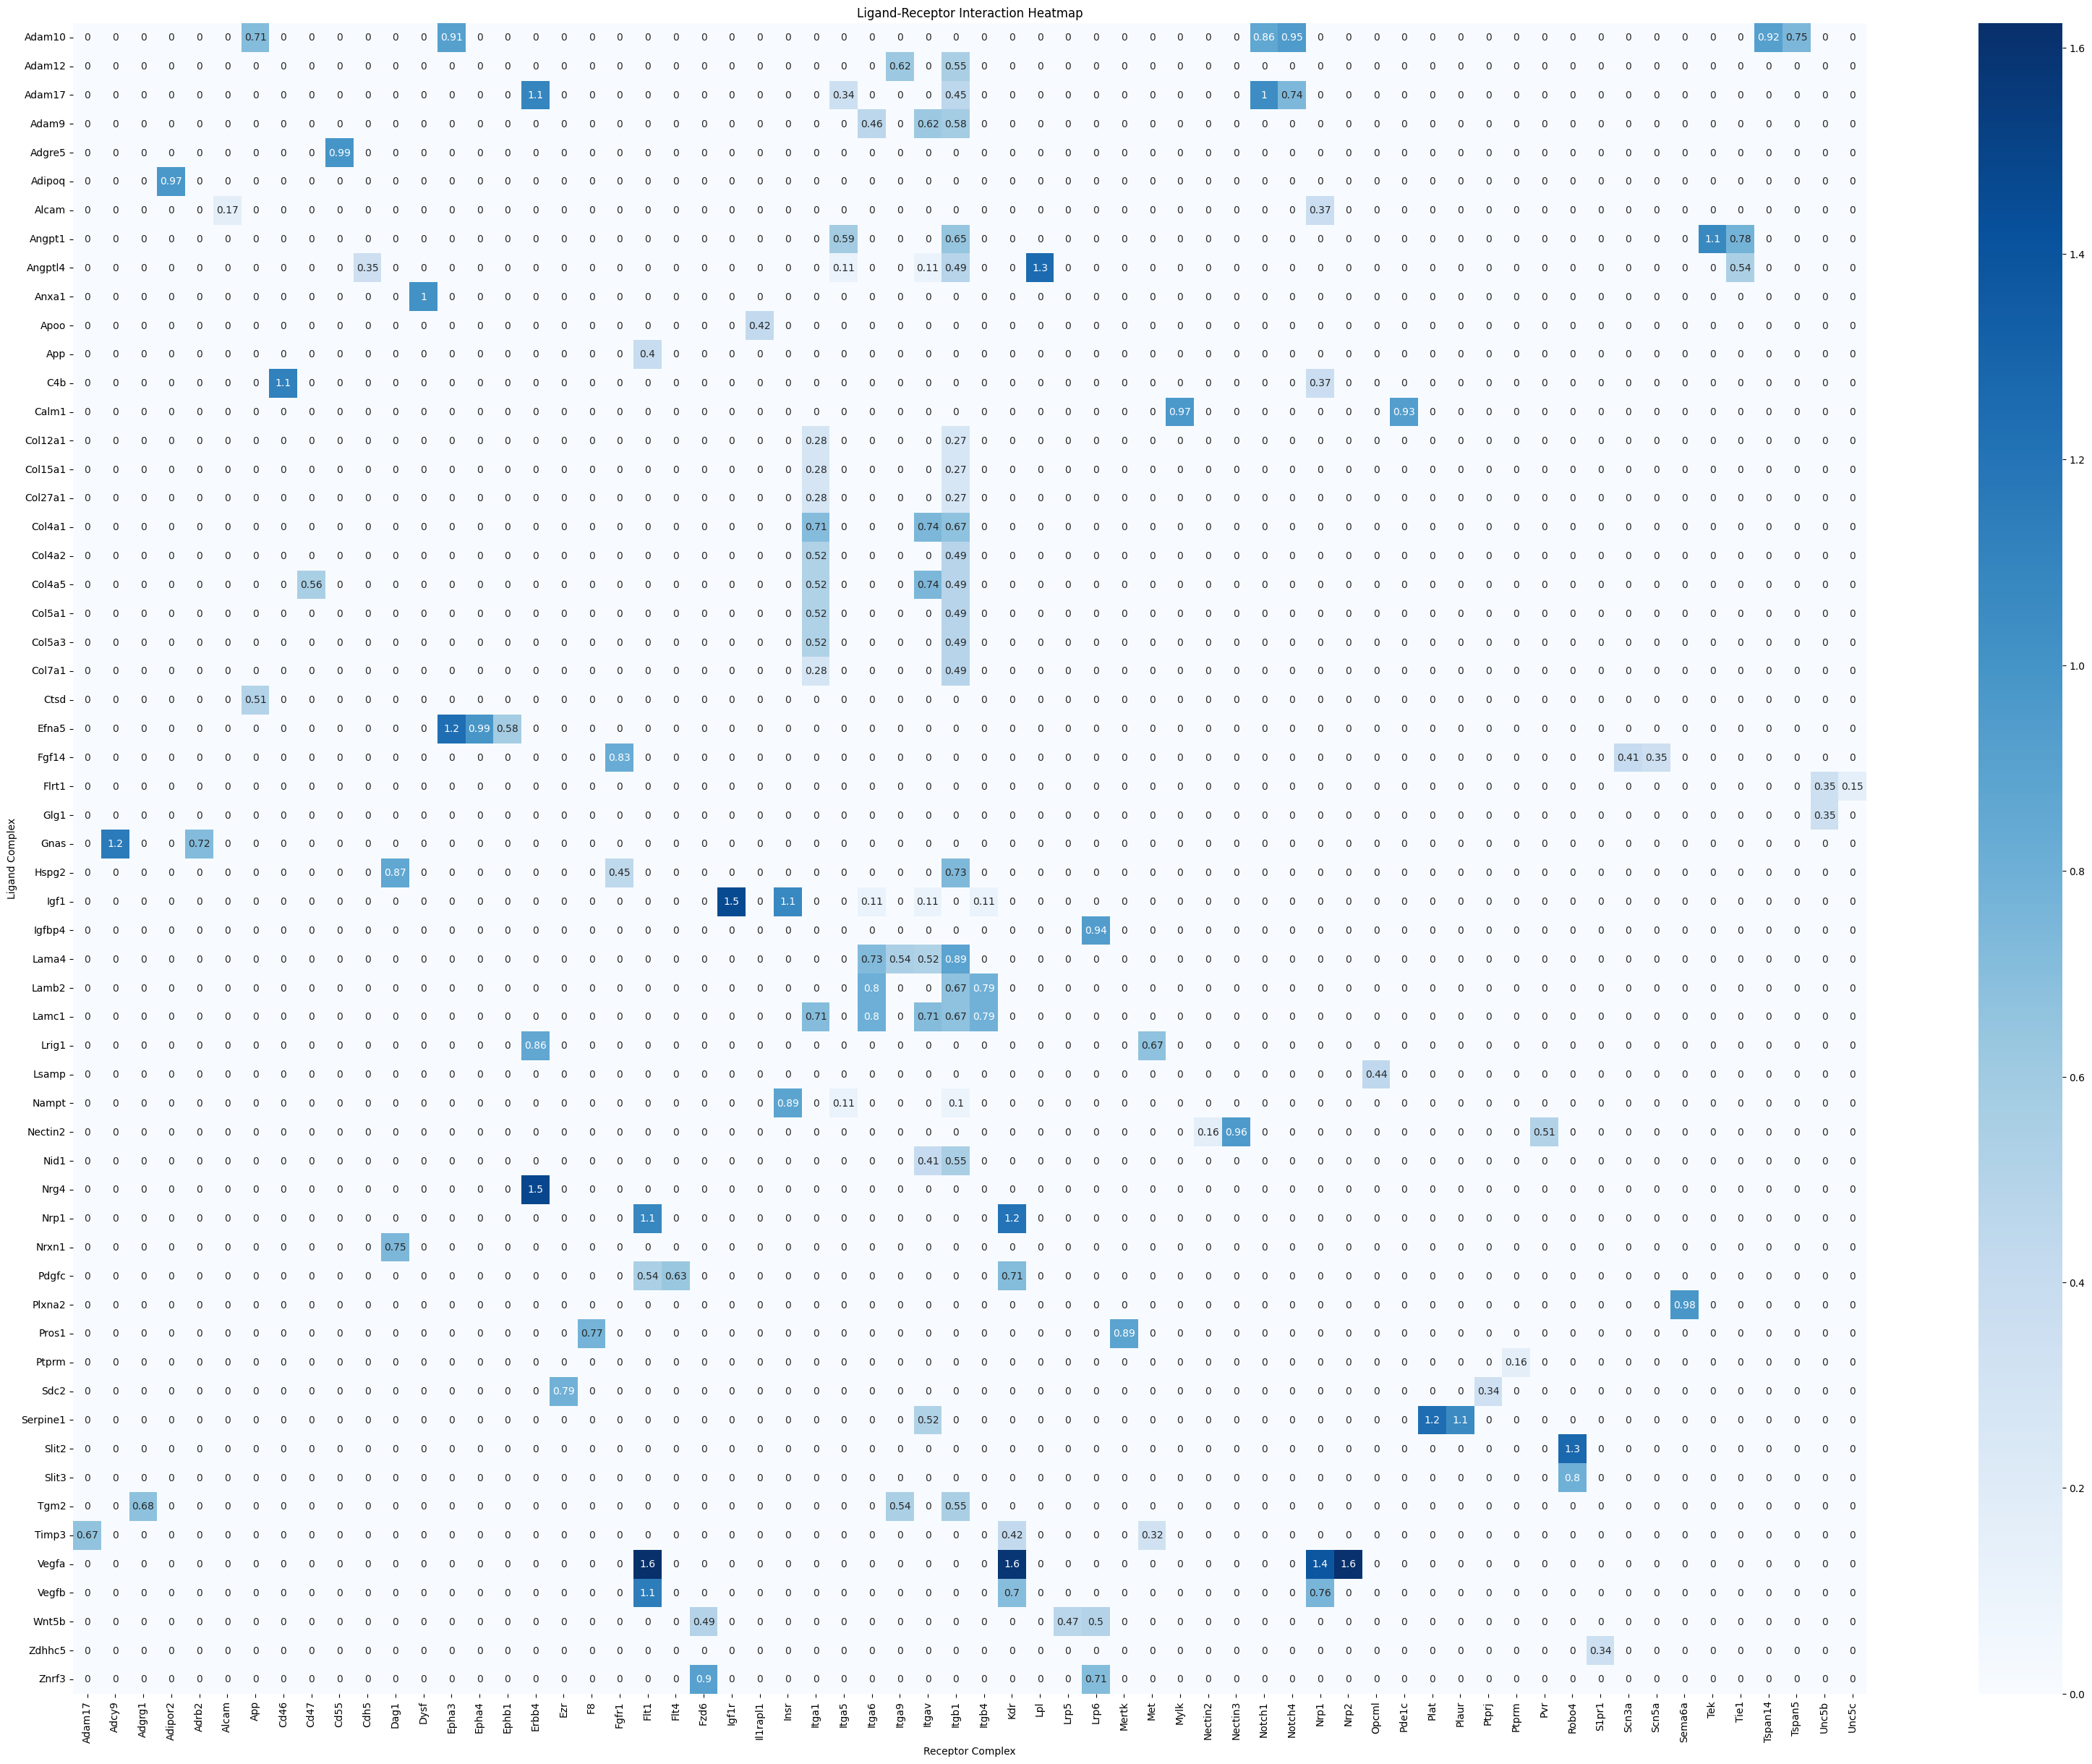

In [26]:
lr_df = datasets['8w_ctrl_male'].uns['nichenet_lr_res']
heatmap_df = lr_df[(lr_df['source'].isin(['Adipocytes'])) & 
                 (lr_df['target'].isin(['Endothelial_Cells']))]
heatmap_df = heatmap_df.pivot_table(values='weight', index='ligand_complex', columns='receptor_complex', fill_value=0)
plt.figure(figsize=(40, 30))
sns.heatmap(heatmap_df, annot=True, cmap='Blues')
plt.title('Ligand-Receptor Interaction Heatmap')
plt.xlabel('Receptor Complex')
plt.ylabel('Ligand Complex')
plt.show()

## Individual Interactions

In [ ]:
import glob
import os
import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
pandas2ri.activate()
from rpy2.robjects.conversion import localconverter
import plotly.graph_objects as go
import numpy as np
import streamlit as st

In [21]:
nichenet_files = glob.glob(os.path.join("../nichenet", "*.rds"))
nichenet_files

['../nichenet/pvat_8weeks_control_female_nichenet.rds',
 '../nichenet/pvat_8weeks_hf_female_nichenet.rds',
 '../nichenet/pvat_24weeks_control_male_nichenet.rds',
 '../nichenet/pvat_8weeks_hf_male_nichenet.rds',
 '../nichenet/pvat_24weeks_control_female_nichenet.rds',
 '../nichenet/pvat_8weeks_control_male_nichenet.rds',
 '../nichenet/pvat_24weeks_hf_male_nichenet.rds',
 '../nichenet/pvat_24weeks_hf_female_nichenet.rds']

In [43]:
readRDS = ro.r['readRDS']
pvat_cci = readRDS('../nichenet/pvat_8weeks_control_male_nichenet.rds')

In [44]:
source_cell = 'Adipocytes'
target_cell = 'Endothelial_Cells'

In [32]:
cell_pair_string = f'{source_cell.replace(" ", "")}2{target_cell.replace(" ", "")}'
cell_one2cell_two = pvat_cci.rx2(cell_pair_string)
ligand_receptor = pandas2ri.rpy2py(cell_one2cell_two.rx2('p_ligand_receptor_network'))
ligand_target = pandas2ri.rpy2py(cell_one2cell_two.rx2('p_ligand_target_network'))

In [71]:
ligand_target.max().max()

0.25346860366680435

In [75]:
filtered_ligand_target = ligand_target.where(ligand_target > 0.1)

filtered_ligand_target = filtered_ligand_target.dropna(how='all').dropna(axis=1, how='all')
filtered_ligand_target

Ackr3   Adamts1    Akap12      Akt3      Amd1    Apold1    Atp2b1  \
Igf1        NaN       NaN       NaN       NaN  0.110096       NaN       NaN   
Tgfa        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
Bmp6        NaN       NaN       NaN       NaN       NaN       NaN  0.144292   
Vegfa  0.253469  0.204125  0.144911  0.101035  0.141418  0.138642       NaN   

         Atp8b1      Bcl2     Bcl6b  ...    Cemip2      Cnn3      Btg2  \
Igf1        NaN       NaN       NaN  ...       NaN       NaN  0.111058   
Tgfa        NaN       NaN       NaN  ...       NaN       NaN       NaN   
Bmp6   0.147112       NaN       NaN  ...       NaN       NaN       NaN   
Vegfa       NaN  0.109694  0.116939  ...  0.119445  0.138652       NaN   

           Cbfb    Arid5b   Arhgef3     Bcar3    Akap9    Ccnl1       Auh  
Igf1        NaN  0.187474       NaN  0.123179      NaN      NaN  0.150991  
Tgfa        NaN       NaN       NaN       NaN  0.13969  0.14012       NaN  
Bmp6   0.142504       NaN  0.147666       NaN      NaN      NaN       NaN  
Vegfa       NaN       NaN       NaN       NaN      NaN      NaN       NaN  

[4 rows x 25 columns]

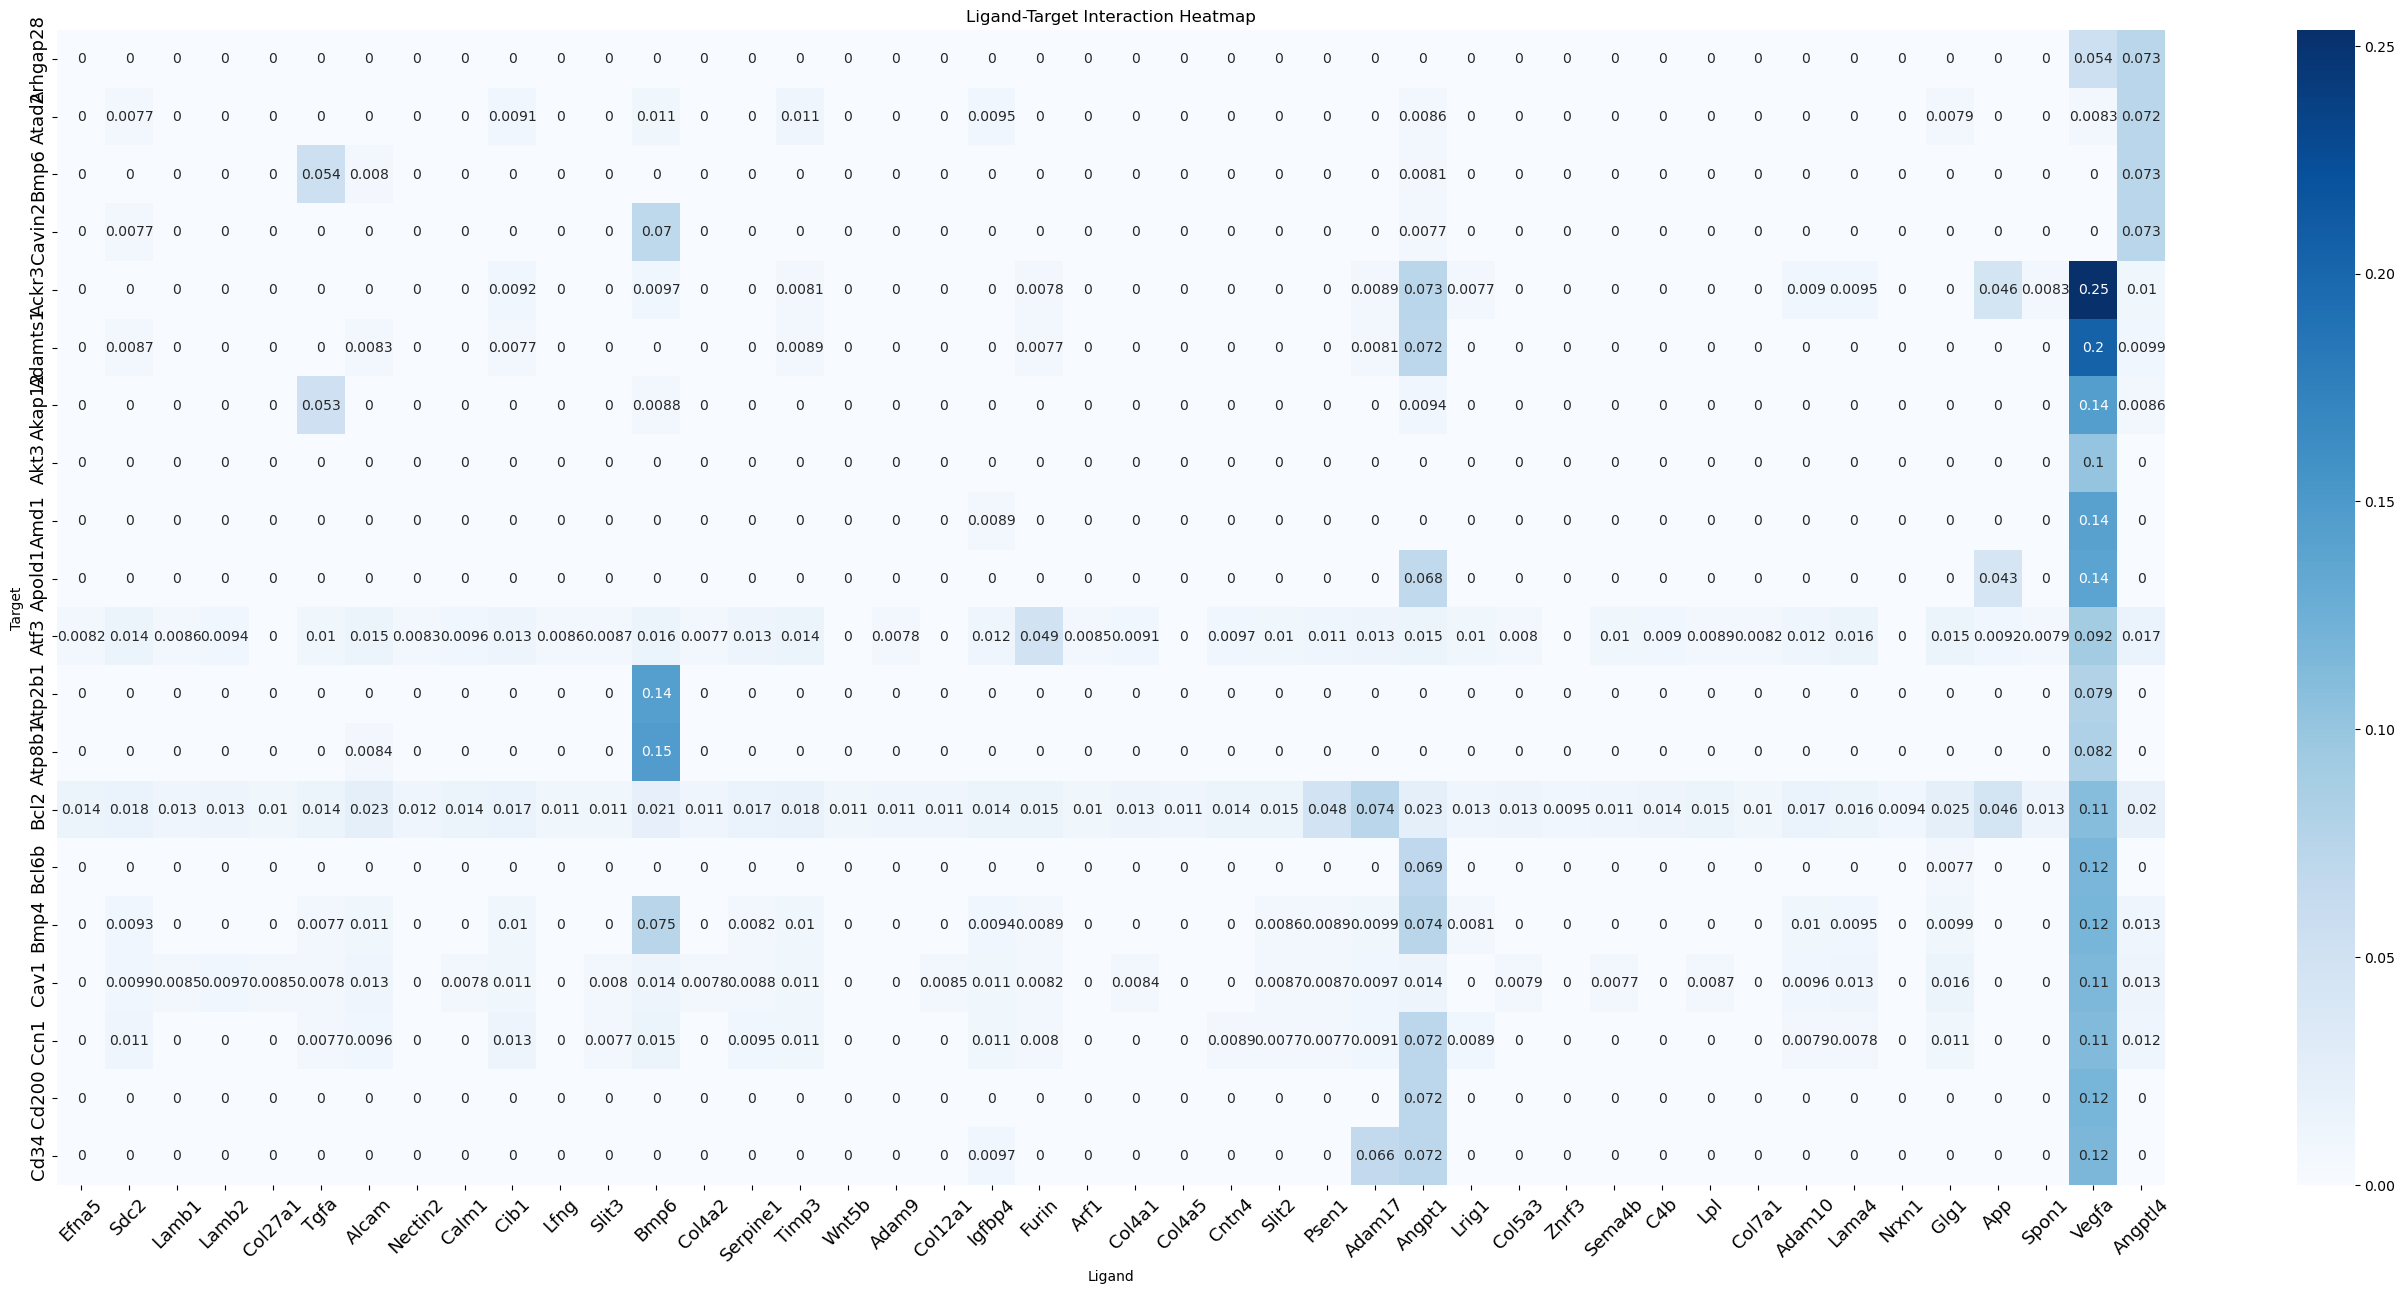

In [83]:
fig, ax = plt.subplots(figsize=(34, 15))
sns.heatmap(ligand_target.iloc[30:,:20].T, annot=True, cmap='Blues', ax=ax)
ax.yaxis.set_tick_params(labelsize=13)
ax.xaxis.set_tick_params(labelsize=13,rotation=45)
ax.set_title('Ligand-Target Interaction Heatmap')
ax.set_xlabel('Ligand')
ax.set_ylabel('Target')
plt.show()

In [37]:
ligand_receptor

Col4a1    Col4a5    Col5a3  Col4a2  Col7a1  Col27a1  Col15a1  \
Sdc3        0.0  0.000000  0.355964     0.0     0.0      0.0      0.0   
Gpihbp1     0.0  0.000000  0.000000     0.0     0.0      0.0      0.0   
Cdh5        0.0  0.000000  0.000000     0.0     0.0      0.0      0.0   
Lpl         0.0  0.000000  0.000000     0.0     0.0      0.0      0.0   
Tek         0.0  0.000000  0.000000     0.0     0.0      0.0      0.0   
...         ...       ...       ...     ...     ...      ...      ...   
Cd47        0.0  0.556918  0.000000     0.0     0.0      0.0      0.0   
Cadm1       0.0  0.000000  0.000000     0.0     0.0      0.0      0.0   
Adipor2     0.0  0.000000  0.000000     0.0     0.0      0.0      0.0   
Adam10      0.0  0.000000  0.000000     0.0     0.0      0.0      0.0   
Adam12      0.0  0.000000  0.000000     0.0     0.0      0.0      0.0   

         Col11a2  Col12a1  Nid1  ...  Gnas  F11r  Efna5  Cib1  Calm1  \
Sdc3         0.0      0.0   0.0  ...   0.0   0.0    0.0   0.0    0.0   
Gpihbp1      0.0      0.0   0.0  ...   0.0   0.0    0.0   0.0    0.0   
Cdh5         0.0      0.0   0.0  ...   0.0   0.0    0.0   0.0    0.0   
Lpl          0.0      0.0   0.0  ...   0.0   0.0    0.0   0.0    0.0   
Tek          0.0      0.0   0.0  ...   0.0   0.0    0.0   0.0    0.0   
...          ...      ...   ...  ...   ...   ...    ...   ...    ...   
Cd47         0.0      0.0   0.0  ...   0.0   0.0    0.0   0.0    0.0   
Cadm1        0.0      0.0   0.0  ...   0.0   0.0    0.0   0.0    0.0   
Adipor2      0.0      0.0   0.0  ...   0.0   0.0    0.0   0.0    0.0   
Adam10       0.0      0.0   0.0  ...   0.0   0.0    0.0   0.0    0.0   
Adam12       0.0      0.0   0.0  ...   0.0   0.0    0.0   0.0    0.0   

            Cadm2  Bmp6  Arf1    Adipoq  Anxa1  
Sdc3     0.000000   0.0   0.0  0.000000    0.0  
Gpihbp1  0.000000   0.0   0.0  0.000000    0.0  
Cdh5     0.000000   0.0   0.0  0.000000    0.0  
Lpl      0.000000   0.0   0.0  0.000000    0.0  
Tek      0.000000   0.0   0.0  0.000000    0.0  
...           ...   ...   ...       ...    ...  
Cd47     0.000000   0.0   0.0  0.000000    0.0  
Cadm1    0.563417   0.0   0.0  0.000000    0.0  
Adipor2  0.000000   0.0   0.0  0.973169    0.0  
Adam10   0.000000   0.0   0.0  0.000000    0.0  
Adam12   0.000000   0.0   0.0  0.000000    0.0  

[75 rows x 74 columns]

In [5]:
interaction_dfs = {
    "8w_ctrl_male": datasets['8w_ctrl_male'].uns['nichenet_lr_res'],
    "8w_ctrl_female": datasets['8w_ctrl_female'].uns['nichenet_lr_res'],
    "8w_hf_male": datasets['8w_hf_male'].uns['nichenet_lr_res'],
    "8w_hf_female": datasets['8w_hf_female'].uns['nichenet_lr_res'],
    "24w_ctrl_male": datasets['24w_ctrl_male'].uns['nichenet_lr_res'],
    "24w_ctrl_female": datasets['24w_ctrl_female'].uns['nichenet_lr_res'],
    "24w_hf_male": datasets['24w_hf_male'].uns['nichenet_lr_res'],
    "24w_hf_female": datasets['24w_hf_female'].uns['nichenet_lr_res']
}

In [11]:
interaction_dfs['8w_ctrl_female'].sort_values(by='weight', ascending=False).head(10)

ligand_complex receptor_complex    weight             source  \
6707           Csf1            Csf1r  1.699032  Mesothelial_Cells   
6561           Csf1            Csf1r  1.699032        Fibroblasts   
4020            Lep             Lepr  1.687307         Adipocytes   
1963           Fgf1            Fgfr1  1.669441  Mesothelial_Cells   
1608           Fgf1            Fgfr1  1.669441       Immune_Cells   
2520           Fgf1            Fgfr1  1.669441  Mesothelial_Cells   
2087           Fgf1            Fgfr1  1.669441          Pericytes   
2309           Fgf1            Fgfr1  1.669441         Adipocytes   
2792           Fgf1            Fgfr1  1.669441         Adipocytes   
1169           Fgf1            Fgfr1  1.669441       Immune_Cells   

                 target  
6707       Immune_Cells  
6561       Immune_Cells  
4020  Mesothelial_Cells  
1963               SMCs  
1608       Immune_Cells  
2520     Neuronal_Cells  
2087       Immune_Cells  
2309  Endothelial_Cells  
2792        Fibroblasts  
1169         Adipocytes

In [12]:
for key, df in interaction_dfs.items():
    print(f"Top 10 interactions in {key}:")
    display(df.sort_values(by='weight', ascending=False).head(10))

Top 10 interactions in 8w_ctrl_male:


ligand_complex receptor_complex    weight             source  \
5019            Hgf              Met  1.925326  Endothelial_Cells   
5118            Hgf              Met  1.925326  Endothelial_Cells   
1319           Csf1            Csf1r  1.699032        Fibroblasts   
3921           Csf1            Csf1r  1.699032  Endothelial_Cells   
2354           Csf1            Csf1r  1.699032  Mesothelial_Cells   
2943            Lep             Lepr  1.687307         Adipocytes   
1009            Lep             Lepr  1.687307         Adipocytes   
3324           Fgf1            Fgfr1  1.669441  Mesothelial_Cells   
648            Fgf1            Fgfr1  1.669441        Fibroblasts   
790            Fgf1            Fgfr1  1.669441               SMCs   

                 target  
5019  Mesothelial_Cells  
5118  Endothelial_Cells  
1319       Immune_Cells  
3921       Immune_Cells  
2354       Immune_Cells  
2943        Fibroblasts  
1009               SMCs  
3324  Mesothelial_Cells  
648        Immune_Cells  
790   Endothelial_Cells

Top 10 interactions in 8w_ctrl_female:


ligand_complex receptor_complex    weight             source  \
6707           Csf1            Csf1r  1.699032  Mesothelial_Cells   
6561           Csf1            Csf1r  1.699032        Fibroblasts   
4020            Lep             Lepr  1.687307         Adipocytes   
1963           Fgf1            Fgfr1  1.669441  Mesothelial_Cells   
1608           Fgf1            Fgfr1  1.669441       Immune_Cells   
2520           Fgf1            Fgfr1  1.669441  Mesothelial_Cells   
2087           Fgf1            Fgfr1  1.669441          Pericytes   
2309           Fgf1            Fgfr1  1.669441         Adipocytes   
2792           Fgf1            Fgfr1  1.669441         Adipocytes   
1169           Fgf1            Fgfr1  1.669441       Immune_Cells   

                 target  
6707       Immune_Cells  
6561       Immune_Cells  
4020  Mesothelial_Cells  
1963               SMCs  
1608       Immune_Cells  
2520     Neuronal_Cells  
2087       Immune_Cells  
2309  Endothelial_Cells  
2792        Fibroblasts  
1169         Adipocytes

Top 10 interactions in 8w_hf_male:


ligand_complex receptor_complex    weight             source  \
1203            Hgf              Met  1.925326  Endothelial_Cells   
3339            Hgf              Met  1.925326  Endothelial_Cells   
2387            Hgf              Met  1.925326  Endothelial_Cells   
2929           Csf1            Csf1r  1.699032        Fibroblasts   
2225           Csf1            Csf1r  1.699032  Mesothelial_Cells   
610            Csf1            Csf1r  1.699032       Immune_Cells   
1591            Lep             Lepr  1.687307         Adipocytes   
5300           Fgf1            Fgfr1  1.669441        Fibroblasts   
1242           Fgf1            Fgfr1  1.669441        Fibroblasts   
483            Fgf1            Fgfr1  1.669441         Adipocytes   

                 target  
1203         Adipocytes  
3339  Mesothelial_Cells  
2387  Endothelial_Cells  
2929       Immune_Cells  
2225       Immune_Cells  
610        Immune_Cells  
1591  Mesothelial_Cells  
5300        Fibroblasts  
1242     Neuronal_Cells  
483      Neuronal_Cells

Top 10 interactions in 8w_hf_female:


ligand_complex receptor_complex    weight             source  \
2673            Hgf              Met  1.925326  Endothelial_Cells   
3254            Hgf              Met  1.925326  Endothelial_Cells   
4787            Hgf              Met  1.925326  Endothelial_Cells   
2041           Csf1            Csf1r  1.699032  Mesothelial_Cells   
895            Csf1            Csf1r  1.699032               SMCs   
1794           Csf1            Csf1r  1.699032        Fibroblasts   
1169           Fgf1            Fgfr1  1.669441         Adipocytes   
1841           Fgf1            Fgfr1  1.669441  Mesothelial_Cells   
1499           Fgf1            Fgfr1  1.669441         Adipocytes   
1637           Fgf1            Fgfr1  1.669441     Neuronal_Cells   

                 target  
2673  Mesothelial_Cells  
3254         Adipocytes  
4787  Endothelial_Cells  
2041       Immune_Cells  
895        Immune_Cells  
1794       Immune_Cells  
1169     Neuronal_Cells  
1841  Endothelial_Cells  
1499        Fibroblasts  
1637     Neuronal_Cells

Top 10 interactions in 24w_ctrl_male:


ligand_complex receptor_complex    weight             source  \
3570            Hgf              Met  1.925326  Endothelial_Cells   
3857            Hgf              Met  1.925326  Endothelial_Cells   
1965            Hgf              Met  1.925326          Pericytes   
2427            Hgf              Met  1.925326          Pericytes   
1496            Hgf              Met  1.925326          Pericytes   
4066            Hgf              Met  1.925326  Endothelial_Cells   
4064           Csf1            Csf1r  1.699032  Mesothelial_Cells   
4209           Csf1            Csf1r  1.699032  Endothelial_Cells   
4997           Csf1            Csf1r  1.699032        Fibroblasts   
3018            Lep             Lepr  1.687307         Adipocytes   

                 target  
3570  Endothelial_Cells  
3857  Mesothelial_Cells  
1965  Mesothelial_Cells  
2427         Adipocytes  
1496  Endothelial_Cells  
4066         Adipocytes  
4064       Immune_Cells  
4209       Immune_Cells  
4997       Immune_Cells  
3018               SMCs

Top 10 interactions in 24w_ctrl_female:


ligand_complex receptor_complex    weight             source  \
4295            Hgf              Met  1.925326  Endothelial_Cells   
8717            Hgf              Met  1.925326  Endothelial_Cells   
4184           Csf1            Csf1r  1.699032  Endothelial_Cells   
2902           Csf1            Csf1r  1.699032  Mesothelial_Cells   
1404           Csf1            Csf1r  1.699032               SMCs   
1816           Csf1            Csf1r  1.699032        Fibroblasts   
2105           Fgf1            Fgfr1  1.669441  Mesothelial_Cells   
2448           Fgf1            Fgfr1  1.669441         Adipocytes   
418            Fgf1            Fgfr1  1.669441               SMCs   
1326           Fgf1            Fgfr1  1.669441         Adipocytes   

                 target  
4295         Adipocytes  
8717  Endothelial_Cells  
4184       Immune_Cells  
2902       Immune_Cells  
1404       Immune_Cells  
1816       Immune_Cells  
2105  Endothelial_Cells  
2448               SMCs  
418        Immune_Cells  
1326         Adipocytes

Top 10 interactions in 24w_hf_male:


ligand_complex receptor_complex    weight             source  \
4466            Hgf              Met  1.925326  Endothelial_Cells   
5436            Hgf              Met  1.925326  Endothelial_Cells   
1927           Csf1            Csf1r  1.699032        Fibroblasts   
2677           Csf1            Csf1r  1.699032  Mesothelial_Cells   
1959            Lep             Lepr  1.687307     Neuronal_Cells   
1345            Lep             Lepr  1.687307     Neuronal_Cells   
2122            Lep             Lepr  1.687307     Neuronal_Cells   
1956            Lep             Lepr  1.687307         Adipocytes   
1897            Lep             Lepr  1.687307         Adipocytes   
3059            Lep             Lepr  1.687307         Adipocytes   

                 target  
4466         Adipocytes  
5436  Endothelial_Cells  
1927       Immune_Cells  
2677       Immune_Cells  
1959     Neuronal_Cells  
1345               SMCs  
2122  Mesothelial_Cells  
1956     Neuronal_Cells  
1897  Mesothelial_Cells  
3059               SMCs

Top 10 interactions in 24w_hf_female:


ligand_complex receptor_complex    weight             source  \
3724            Hgf              Met  1.925326  Endothelial_Cells   
3414            Hgf              Met  1.925326  Endothelial_Cells   
9282            Hgf              Met  1.925326  Endothelial_Cells   
1157           Csf1            Csf1r  1.699032  Mesothelial_Cells   
218            Csf1            Csf1r  1.699032       Immune_Cells   
1501           Csf1            Csf1r  1.699032        Fibroblasts   
982            Fgf1            Fgfr1  1.669441     Neuronal_Cells   
5058           Fgf1            Fgfr1  1.669441     Neuronal_Cells   
1334           Fgf1            Fgfr1  1.669441               SMCs   
573            Fgf1            Fgfr1  1.669441          Pericytes   

                 target  
3724         Adipocytes  
3414  Mesothelial_Cells  
9282  Endothelial_Cells  
1157       Immune_Cells  
218        Immune_Cells  
1501       Immune_Cells  
982                SMCs  
5058     Neuronal_Cells  
1334               SMCs  
573        Immune_Cells

In [16]:
interaction_dfs = {
    "8w_ctrl_male": datasets['8w_ctrl_male'].uns['cellchat_res'],
    "8w_ctrl_female": datasets['8w_ctrl_female'].uns['cellchat_res'],
    "8w_hf_male": datasets['8w_hf_male'].uns['cellchat_res'],
    "8w_hf_female": datasets['8w_hf_female'].uns['cellchat_res'],
    "24w_ctrl_male": datasets['24w_ctrl_male'].uns['cellchat_res'],
    "24w_ctrl_female": datasets['24w_ctrl_female'].uns['cellchat_res'],
    "24w_hf_male": datasets['24w_hf_male'].uns['cellchat_res'],
    "24w_hf_female": datasets['24w_hf_female'].uns['cellchat_res']
}

for key, df in interaction_dfs.items():
    print(f"Top 10 ligand receptor interactions in {key}:")
    display(df.sort_values(by='lr_probs', ascending=False)[['ligand', 'receptor', 'source', 'target']].head(10))

Top 10 ligand receptor interactions in 8w_ctrl_male:


ligand receptor             source             target
92     Vegfa     Nrp1         Adipocytes         Adipocytes
759      C4a     Nrp1  Mesothelial_Cells         Adipocytes
1470   Vegfa     Nrp1         Adipocytes  Endothelial_Cells
3136   Vegfa     Egfr         Adipocytes        Fibroblasts
11726   Ntf3    Ntrk3               SMCs               SMCs
377      App     Lrp6        Fibroblasts         Adipocytes
1060     App     Lrp6          Pericytes         Adipocytes
5861   Efna5    Ephb1         Adipocytes  Mesothelial_Cells
3133    Nrg4     Egfr         Adipocytes        Fibroblasts
10522   Gnas    Adcy9         Adipocytes               SMCs

Top 10 ligand receptor interactions in 8w_ctrl_female:


ligand receptor             source             target
92     Vegfa     Nrp1         Adipocytes         Adipocytes
759      C4a     Nrp1  Mesothelial_Cells         Adipocytes
1470   Vegfa     Nrp1         Adipocytes  Endothelial_Cells
3136   Vegfa     Egfr         Adipocytes        Fibroblasts
11726   Ntf3    Ntrk3               SMCs               SMCs
377      App     Lrp6        Fibroblasts         Adipocytes
1060     App     Lrp6          Pericytes         Adipocytes
5861   Efna5    Ephb1         Adipocytes  Mesothelial_Cells
3133    Nrg4     Egfr         Adipocytes        Fibroblasts
10522   Gnas    Adcy9         Adipocytes               SMCs

Top 10 ligand receptor interactions in 8w_hf_male:


ligand receptor             source             target
69     Vegfa     Nrp1         Adipocytes         Adipocytes
7264  Sorbs1    Itga1         Adipocytes               SMCs
7713   Lama2    Itga1        Fibroblasts               SMCs
617      C4a     Nrp1  Mesothelial_Cells         Adipocytes
38     Ntrk3    Ptprs         Adipocytes         Adipocytes
4462   Ntrk3    Ptprs         Adipocytes  Mesothelial_Cells
36    Sorbs1    Itga1         Adipocytes         Adipocytes
6255  Sorbs1    Itga1         Adipocytes          Pericytes
4437   Vegfa     Egfr         Adipocytes  Mesothelial_Cells
6518   Lama2    Itga1        Fibroblasts          Pericytes

Top 10 ligand receptor interactions in 8w_hf_female:


ligand receptor             source             target
92     Vegfa     Nrp1         Adipocytes         Adipocytes
759      C4a     Nrp1  Mesothelial_Cells         Adipocytes
1470   Vegfa     Nrp1         Adipocytes  Endothelial_Cells
3136   Vegfa     Egfr         Adipocytes        Fibroblasts
11726   Ntf3    Ntrk3               SMCs               SMCs
377      App     Lrp6        Fibroblasts         Adipocytes
1060     App     Lrp6          Pericytes         Adipocytes
5861   Efna5    Ephb1         Adipocytes  Mesothelial_Cells
3133    Nrg4     Egfr         Adipocytes        Fibroblasts
10522   Gnas    Adcy9         Adipocytes               SMCs

Top 10 ligand receptor interactions in 24w_ctrl_male:


ligand receptor          source             target
12363   Ncam1  Cacna1c  Neuronal_Cells               SMCs
11146  Sorbs1    Itga1      Adipocytes               SMCs
11581   Lama2    Itga1     Fibroblasts               SMCs
93      Vegfa     Nrp1      Adipocytes         Adipocytes
12797  Sorbs1    Itga1            SMCs               SMCs
1405    Vegfa     Nrp1      Adipocytes  Endothelial_Cells
10673   Ncam1  Cacna1c  Neuronal_Cells          Pericytes
12961    Ntf3    Ntrk3            SMCs               SMCs
12277   Lama2    Itga1  Neuronal_Cells               SMCs
11126   Vegfa    Itgb1      Adipocytes               SMCs

Top 10 ligand receptor interactions in 24w_ctrl_female:


ligand receptor             source             target
1267   Vegfa     Nrp1         Adipocytes  Endothelial_Cells
83     Vegfa     Nrp1         Adipocytes         Adipocytes
9208    Ntf3    Ntrk3               SMCs               SMCs
8663   Ncam1  Cacna1c     Neuronal_Cells               SMCs
665      C4a     Nrp1  Mesothelial_Cells         Adipocytes
1906     C4a     Nrp1  Mesothelial_Cells  Endothelial_Cells
7596  Sorbs1    Itga1         Adipocytes               SMCs
1164    Ntf3    Ntrk3               SMCs         Adipocytes
2446   Vegfa     Egfr         Adipocytes        Fibroblasts
7582   Vegfa    Itgb1         Adipocytes               SMCs

Top 10 ligand receptor interactions in 24w_hf_male:


ligand receptor          source             target
10501  Sorbs1    Itga1      Adipocytes               SMCs
89      Vegfa     Nrp1      Adipocytes         Adipocytes
11726   Ncam1  Cacna1c  Neuronal_Cells               SMCs
10947   Lama2    Itga1     Fibroblasts               SMCs
10483   Vegfa    Itgb1      Adipocytes               SMCs
11641   Lama2    Itga1  Neuronal_Cells               SMCs
46      Ntrk3    Ptprs      Adipocytes         Adipocytes
1283     Ntf3    Ntrk3            SMCs         Adipocytes
10009   Ncam1  Cacna1c  Neuronal_Cells          Pericytes
1363   Sorbs1    Itga1      Adipocytes  Endothelial_Cells

Top 10 ligand receptor interactions in 24w_hf_female:


ligand receptor             source             target
74     Vegfa     Nrp1         Adipocytes         Adipocytes
7426  Sorbs1    Itga1         Adipocytes               SMCs
593      C4a     Nrp1  Mesothelial_Cells         Adipocytes
42     Ntrk3    Ptprs         Adipocytes         Adipocytes
1059    Ntf3    Ntrk3               SMCs         Adipocytes
1145   Vegfa     Nrp1         Adipocytes  Endothelial_Cells
46       App     Lrp6         Adipocytes         Adipocytes
302      App     Lrp6        Fibroblasts         Adipocytes
818      App     Lrp6          Pericytes         Adipocytes
156      App     Lrp6  Endothelial_Cells         Adipocytes

In [50]:
import pandas as pd
from IPython.display import display, HTML

def style_dataframe(df, title):
    top_interactions = df.sort_values(by='lr_probs', ascending=False)[['ligand', 'receptor', 'source', 'target']].head(10)
    
    styled_df = top_interactions.style.set_caption(title).set_table_styles(
        [{'selector': 'caption', 'props': [('font-size', '14px'), ('font-weight', 'bold'), ('text-align', 'center')]}]
    ).set_properties(**{'text-align': 'center'}).hide_index()
    
    return styled_df

html_template = '<div style="display: flex; flex-wrap: wrap; gap: 20px;">'

for i, (key, df) in enumerate(interaction_dfs.items()):
    styled_df_html = style_dataframe(df, f"Top 10 Interactions in {key}").render()
    html_template += f'<div style="flex: 1 1 calc(25% - 20px); min-width: 300px;">{styled_df_html}</div>'

html_template += '</div>'

display(HTML(html_template))


/var/folders/kk/5gbzbkc93xb_g56p3bt9t8gh0000gp/T/ipykernel_40149/4111781171.py:12: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  ).set_properties(**{'text-align': 'center'}).hide_index()
/var/folders/kk/5gbzbkc93xb_g56p3bt9t8gh0000gp/T/ipykernel_40149/4111781171.py:21: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  styled_df_html = style_dataframe(df, f"Top 10 Interactions in {key}").render()
/var/folders/kk/5gbzbkc93xb_g56p3bt9t8gh0000gp/T/ipykernel_40149/4111781171.py:12: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  ).set_properties(**{'text-align': 'center'}).hide_index()
/var/folders/kk/5gbzbkc93xb_g56p3bt9t8gh0000gp/T/ipykernel_40149/4111781171.py:21: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  styled_df_html = style_dataframe(df, f"Top 10 Interactions in {key}").render()
/var/folders/kk/5gbzbkc93xb_g56p3bt9t8gh0000gp/T/ipykernel_40149/4111781171.

In [55]:
datasets['8w_ctrl_male'].uns['cellchat_interaction_table_count']

Adipocytes  Endothelial_Cells  Fibroblasts  Immune_Cells  \
source                                                                        
Adipocytes                134                145          130           124   
Endothelial_Cells         127                141          125           120   
Fibroblasts               177                234          185           174   
Immune_Cells               77                 72           69            72   
Mesothelial_Cells         195                226          186           185   
Neuronal_Cells            145                166          147           126   
Pericytes                 137                172          148           136   
SMCs                      168                203          173           153   

                   Mesothelial_Cells  Neuronal_Cells  Pericytes  SMCs  
source                                                                 
Adipocytes                       156             136        139   118  
Endothelial_Cells                147             127        132   117  
Fibroblasts                      232             195        193   170  
Immune_Cells                      73              74         79    62  
Mesothelial_Cells                242             210        189   178  
Neuronal_Cells                   176             156        156   134  
Pericytes                        178             156        154   134  
SMCs                             211             178        182   160

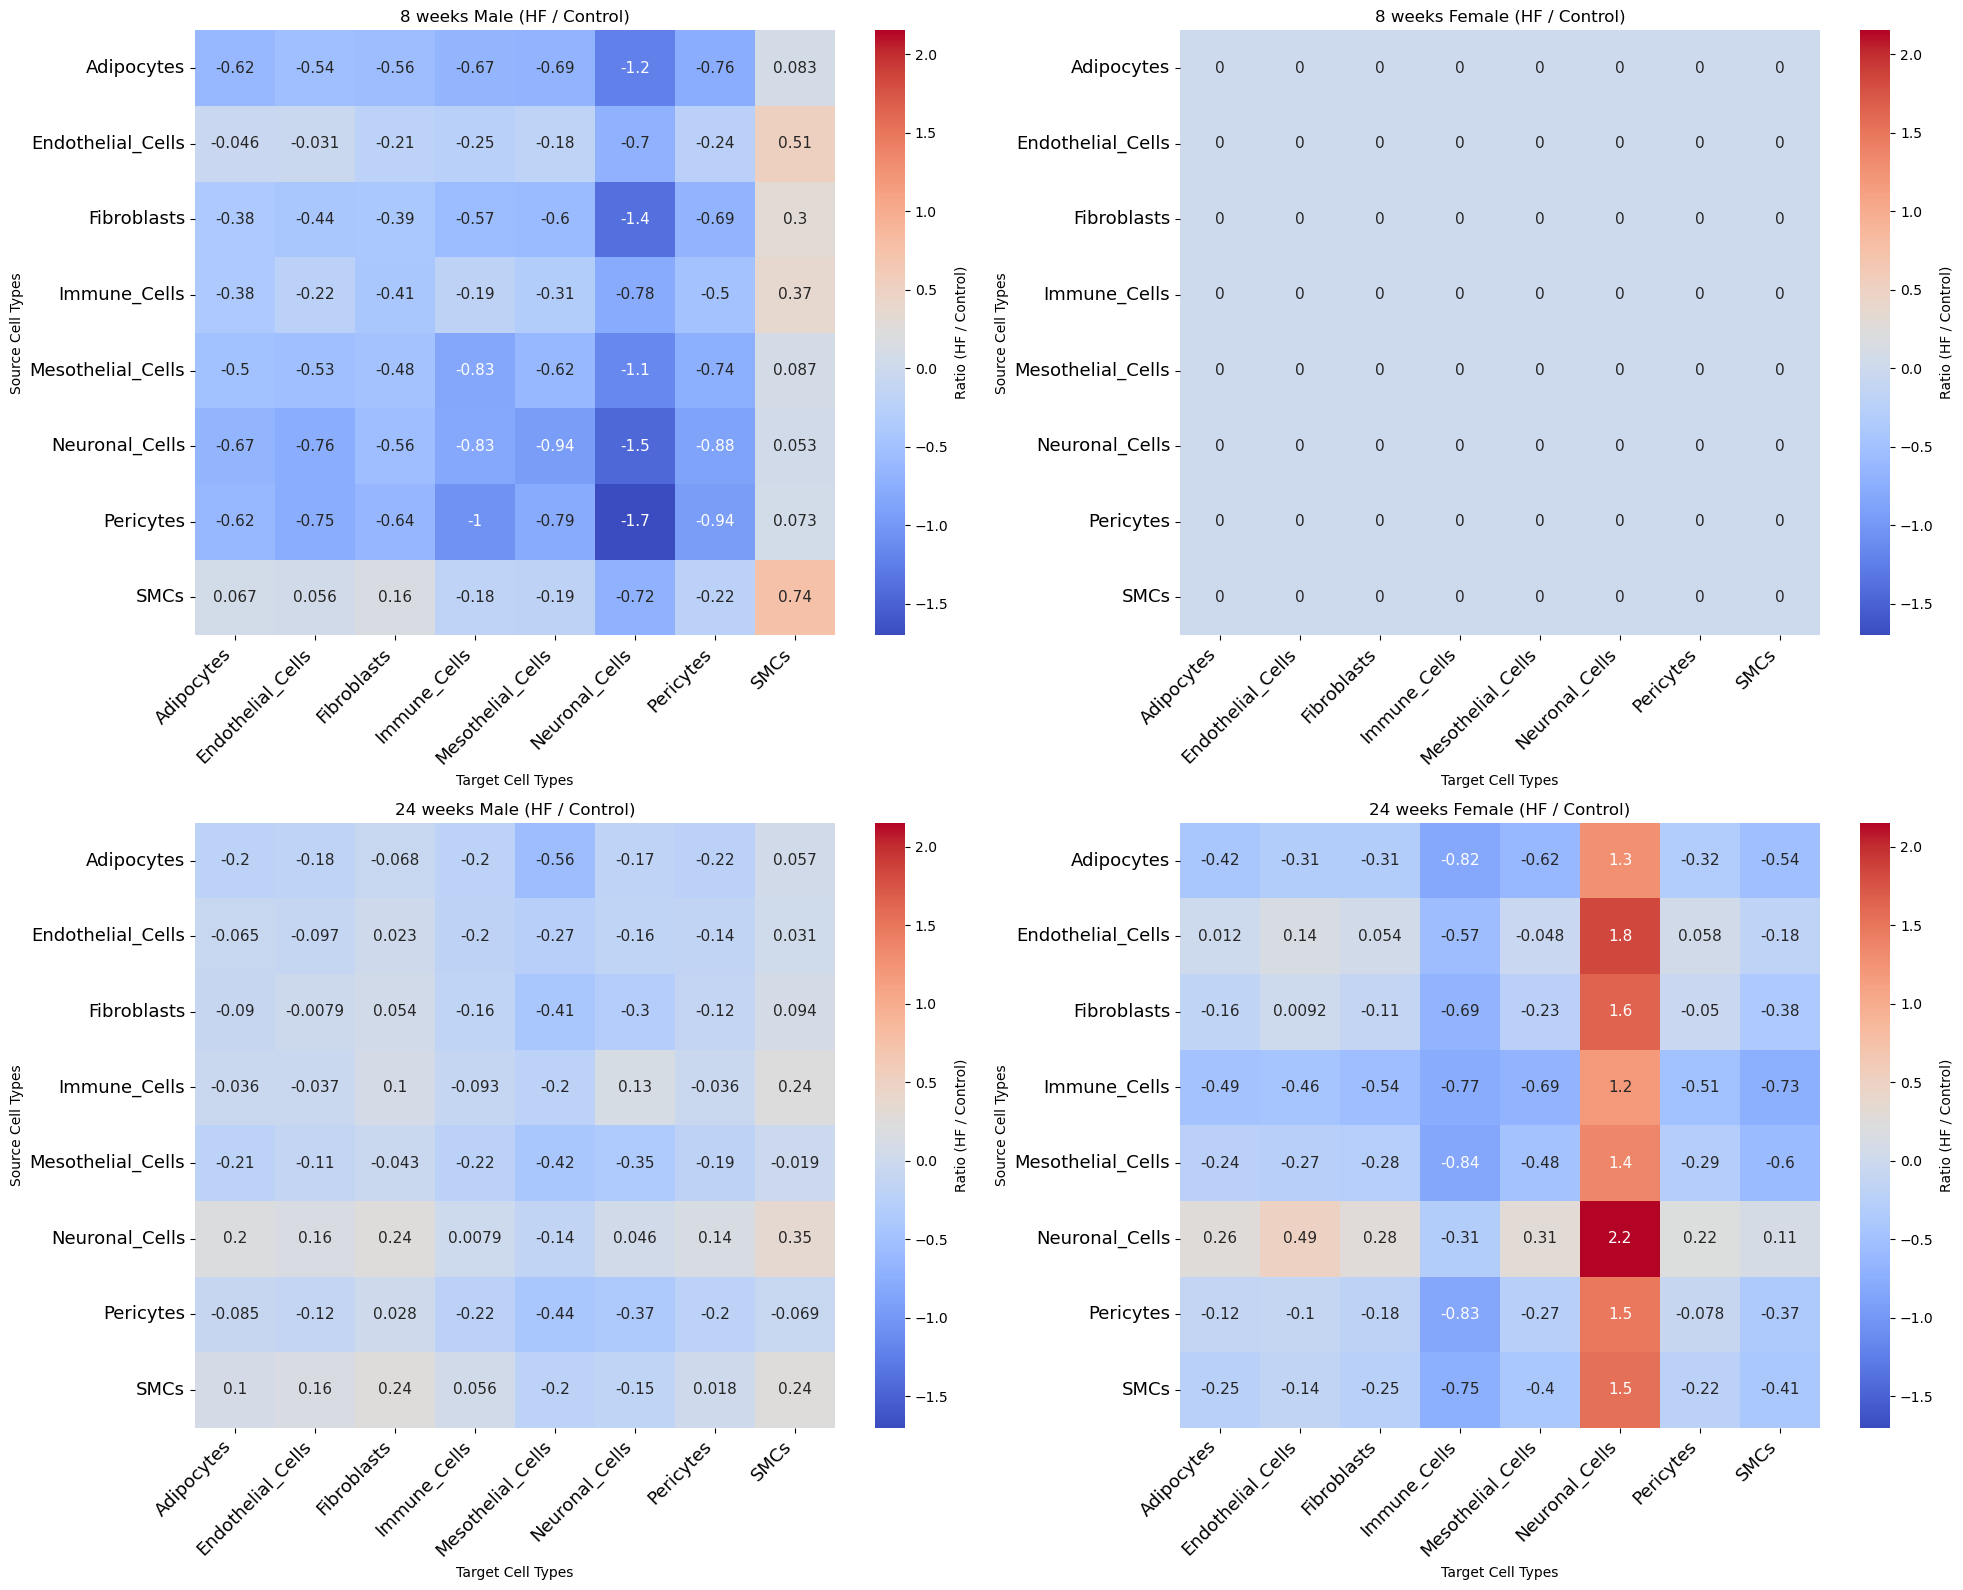

In [75]:
male_8w_hf_vs_control = np.divide(datasets['8w_hf_male'].uns['cellchat_interaction_table_count'], datasets['8w_ctrl_male'].uns['cellchat_interaction_table_count'])
female_8w_hf_vs_control = np.divide(datasets['8w_hf_female'].uns['cellchat_interaction_table_count'], datasets['8w_ctrl_female'].uns['cellchat_interaction_table_count'])
male_24w_hf_vs_control = np.divide(datasets['24w_hf_male'].uns['cellchat_interaction_table_count'], datasets['24w_ctrl_male'].uns['cellchat_interaction_table_count'])
female_24w_hf_vs_control = np.divide(datasets['24w_hf_female'].uns['cellchat_interaction_table_count'], datasets['24w_ctrl_female'].uns['cellchat_interaction_table_count'])


interaction_dfs = {
    '8 weeks Male (HF / Control)': male_8w_hf_vs_control,
    '8 weeks Female (HF / Control)': female_8w_hf_vs_control,
    '24 weeks Male (HF / Control)': male_24w_hf_vs_control,
    '24 weeks Female (HF / Control)': female_24w_hf_vs_control
}

min_scale = np.log2(min([matrix.min().min() for matrix in interaction_dfs.values()]))
max_scale = np.log2(max([matrix.max().max() for matrix in interaction_dfs.values()]))

fig, axes = plt.subplots(2, 2, figsize=(20, 16))
cmap = sns.diverging_palette(220, 10, as_cmap=True) 

for ax, (title, matrix) in zip(axes.flatten(), interaction_dfs.items()):
    sns.heatmap(log2_transform(matrix), annot=True, cmap="coolwarm", ax=ax, cbar_kws={'label': 'Ratio (HF / Control)'}, vmin=min_scale,vmax=max_scale, annot_kws={"size": 11})
    
    
    ax.set_title(title)
    ax.set_xlabel('Target Cell Types')
    ax.set_ylabel('Source Cell Types')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=13)  
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=13) 

plt.tight_layout()
plt.savefig('Interactions_Count_HF_vs_Control(CellChat).pdf', format='pdf')
plt.show()

In [68]:
interaction_pivot_table = datasets['8w_ctrl_female'].uns['cellchat_interaction_table_count']

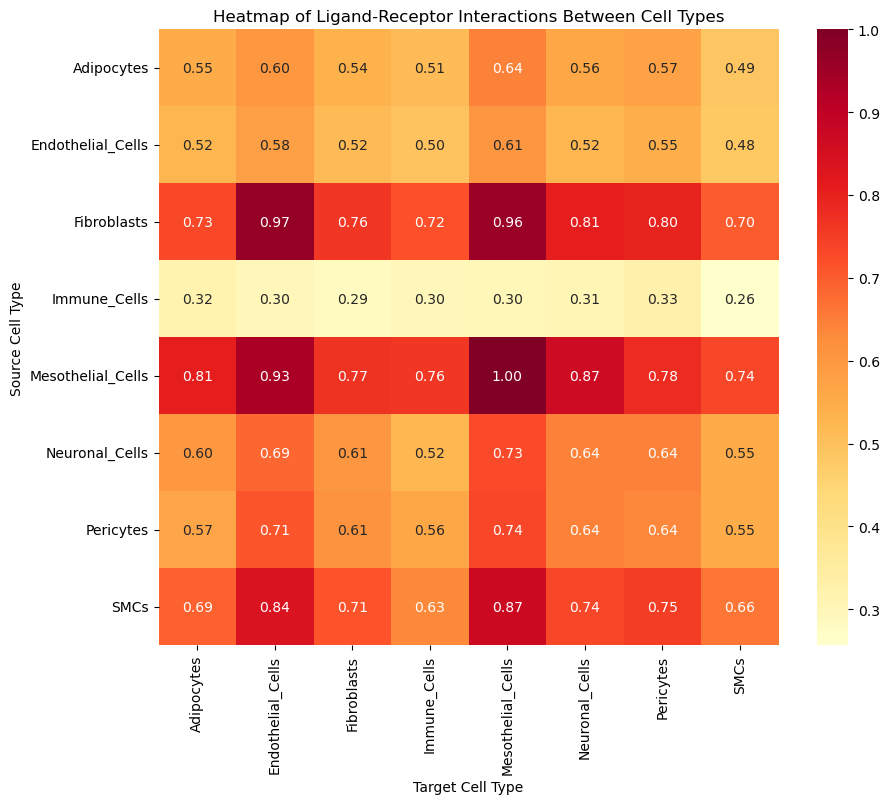

In [69]:
#interaction_pivot_table_cellchat = control_female_8weeks.uns['cellchat_res'].groupby(['source', 'target', 'ligand_complex', 'receptor_complex']).size().groupby(['source', 'target']).sum().unstack(fill_value=0)
interaction_pivot_table_cellchat_norm = interaction_pivot_table / interaction_pivot_table.max().max()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(interaction_pivot_table_cellchat_norm, annot=True, cmap="YlOrRd", fmt=".2f", ax=ax)
ax.set_title('Heatmap of Ligand-Receptor Interactions Between Cell Types')
ax.set_ylabel('Source Cell Type')
ax.set_xlabel('Target Cell Type')
plt.show()